# 1. Imports & global variables

In [2]:
# Import setup
from setup.setup import *

In [3]:
# Import seaborn and matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [4]:
# Set seaborn theme
sns.set_theme(style = 'darkgrid')

In [5]:
# Load and clean cdl data
cdlDF = load_and_clean_cdl_data()
cdlDF

c:\Users\David Harler Jr\OneDrive\Desktop\dataClass\06-cod-analysis\03 CDL PrizePicks Betting\cdl_prizepicks_betting\cdl-betting-app-v03\setup\setup.py:39: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  cdlDF = sqlio.read_sql_query("SELECT * FROM cdl_data", conn)


,match_id,match_date,match_day,player,team,map_num,map_name,gamemode,kills,deaths,...,series_result,map_wl,team_abbr,team_icon,opp,opp_abbr,opp_score,total_score,score_diff,dummy_x
0,27193,2023-12-08,Friday,aBeZy,Atlanta FaZe,1,Karachi,Hardpoint,24,24,...,1,W,ATL,FaZe,Boston Breach,BOS,238,488,12,0
1,27193,2023-12-08,Friday,Cellium,Atlanta FaZe,1,Karachi,Hardpoint,21,19,...,1,W,ATL,FaZe,Boston Breach,BOS,238,488,12,0
2,27193,2023-12-08,Friday,Drazah,Atlanta FaZe,1,Karachi,Hardpoint,25,22,...,1,W,ATL,FaZe,Boston Breach,BOS,238,488,12,0
3,27193,2023-12-08,Friday,Simp,Atlanta FaZe,1,Karachi,Hardpoint,33,23,...,1,W,ATL,FaZe,Boston Breach,BOS,238,488,12,0
4,27193,2023-12-08,Friday,Capsidal,Boston Breach,1,Karachi,Hardpoint,24,26,...,0,L,BOS,Breach,Atlanta FaZe,ATL,250,488,-12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4643,27304,2024-05-03,Friday,Simp,Atlanta FaZe,3,Highrise,Control,20,15,...,1,W,ATL,FaZe,Las Vegas Legion,LV,0,3,3,0
4644,27304,2024-05-03,Friday,Asim,Las Vegas Legion,3,Highrise,Control,13,20,...,0,L,LV,Legion,Atlanta FaZe,ATL,3,3,-3,0
4645,27304,2024-05-03,Friday,Attach,Las Vegas Legion,3,Highrise,Control,12,18,...,0,L,LV,Legion,Atlanta FaZe,ATL,3,3,-3,0
4646,27304,2024-05-03,Friday,Gio,Las Vegas Legion,3,Highrise,Control,16,16,...,0,L,LV,Legion,Atlanta FaZe,ATL,3,3,-3,0


In [6]:
# Check columns
cdlDF.columns

Index(['match_id', 'match_date', 'match_day', 'player', 'team', 'map_num',
       'map_name', 'gamemode', 'kills', 'deaths', 'kd', 'plus_minus', 'dmg',
       'team_score', 'map_result', 'series_result', 'map_wl', 'team_abbr',
       'team_icon', 'opp', 'opp_abbr', 'opp_score', 'total_score',
       'score_diff', 'dummy_x'],
      dtype='object')

In [7]:
# Drop columns
cdlDF = cdlDF.drop(['match_day', 'deaths', 'kd', 'plus_minus', 'dmg'], axis = 1)
cdlDF

,match_id,match_date,player,team,map_num,map_name,gamemode,kills,team_score,map_result,series_result,map_wl,team_abbr,team_icon,opp,opp_abbr,opp_score,total_score,score_diff,dummy_x
0,27193,2023-12-08,aBeZy,Atlanta FaZe,1,Karachi,Hardpoint,24,250,1,1,W,ATL,FaZe,Boston Breach,BOS,238,488,12,0
1,27193,2023-12-08,Cellium,Atlanta FaZe,1,Karachi,Hardpoint,21,250,1,1,W,ATL,FaZe,Boston Breach,BOS,238,488,12,0
2,27193,2023-12-08,Drazah,Atlanta FaZe,1,Karachi,Hardpoint,25,250,1,1,W,ATL,FaZe,Boston Breach,BOS,238,488,12,0
3,27193,2023-12-08,Simp,Atlanta FaZe,1,Karachi,Hardpoint,33,250,1,1,W,ATL,FaZe,Boston Breach,BOS,238,488,12,0
4,27193,2023-12-08,Capsidal,Boston Breach,1,Karachi,Hardpoint,24,238,0,0,L,BOS,Breach,Atlanta FaZe,ATL,250,488,-12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4643,27304,2024-05-03,Simp,Atlanta FaZe,3,Highrise,Control,20,3,1,1,W,ATL,FaZe,Las Vegas Legion,LV,0,3,3,0
4644,27304,2024-05-03,Asim,Las Vegas Legion,3,Highrise,Control,13,0,0,0,L,LV,Legion,Atlanta FaZe,ATL,3,3,-3,0
4645,27304,2024-05-03,Attach,Las Vegas Legion,3,Highrise,Control,12,0,0,0,L,LV,Legion,Atlanta FaZe,ATL,3,3,-3,0
4646,27304,2024-05-03,Gio,Las Vegas Legion,3,Highrise,Control,16,0,0,0,L,LV,Legion,Atlanta FaZe,ATL,3,3,-3,0


In [8]:
# Updated cdlDF & Major 3 cdlDF
updated_cdl_DF = filter_maps(cdlDF).copy().reset_index(drop=True)
major_3_df = cdlDF[cdlDF["match_date"] >= np.datetime64('2024-04-12')].copy().reset_index(drop=True)

In [9]:
# Get All Map Mode Combos
all_map_mode_combos = cdlDF[['gamemode', 'map_name']].drop_duplicates().sort_values(['gamemode', 'map_name']).reset_index(drop = True)
all_map_mode_combos

,gamemode,map_name
0,Hardpoint,6 Star
1,Hardpoint,Invasion
2,Hardpoint,Karachi
3,Hardpoint,Rio
4,Hardpoint,Skidrow
5,Hardpoint,Sub Base
6,Hardpoint,Terminal
7,Hardpoint,Vista
8,Search & Destroy,6 Star
9,Search & Destroy,Highrise


In [10]:
# Check to see if any Map Mode Combos are unintenionally excluded from Maps 1 - 3
all_map_mode_combos_1_thru_3 = cdlDF[cdlDF["map_num"] <= 3][['gamemode', 'map_name']].drop_duplicates().sort_values(['gamemode', 'map_name']).reset_index(drop = True)
all_map_mode_combos_1_thru_3

,gamemode,map_name
0,Hardpoint,6 Star
1,Hardpoint,Invasion
2,Hardpoint,Karachi
3,Hardpoint,Rio
4,Hardpoint,Skidrow
5,Hardpoint,Sub Base
6,Hardpoint,Terminal
7,Hardpoint,Vista
8,Search & Destroy,6 Star
9,Search & Destroy,Highrise


In [11]:
# Major 3 Map Mode Combos
major_3_map_mode_combos = major_3_df[['gamemode', 'map_name']].drop_duplicates().sort_values(['gamemode', 'map_name']).reset_index(drop = True)
major_3_map_mode_combos

,gamemode,map_name
0,Hardpoint,6 Star
1,Hardpoint,Karachi
2,Hardpoint,Rio
3,Hardpoint,Sub Base
4,Hardpoint,Vista
5,Search & Destroy,6 Star
6,Search & Destroy,Highrise
7,Search & Destroy,Invasion
8,Search & Destroy,Karachi
9,Search & Destroy,Rio


In [12]:
# 'Almost' Full Season Map Mode Combos
full_season_map_mode_combos = major_3_map_mode_combos[
    (major_3_map_mode_combos["map_name"] != "6 Star") &
    (major_3_map_mode_combos["map_name"] != "Vista")
].reset_index(drop=True)

full_season_map_mode_combos

,gamemode,map_name
0,Hardpoint,Karachi
1,Hardpoint,Rio
2,Hardpoint,Sub Base
3,Search & Destroy,Highrise
4,Search & Destroy,Invasion
5,Search & Destroy,Karachi
6,Search & Destroy,Rio
7,Control,Highrise
8,Control,Invasion
9,Control,Karachi


In [13]:
# Removed Map Mode Combos
removed_map_mode_combos = pd.merge(all_map_mode_combos, major_3_map_mode_combos, on=['gamemode', 'map_name'], how='left', indicator=True)
removed_map_mode_combos = removed_map_mode_combos[removed_map_mode_combos['_merge'] == 'left_only'].drop(columns=['_merge']).reset_index(drop=True)
removed_map_mode_combos

,gamemode,map_name
0,Hardpoint,Invasion
1,Hardpoint,Skidrow
2,Hardpoint,Terminal
3,Search & Destroy,Skidrow
4,Search & Destroy,Terminal


In [14]:
# Team colors
team_colors = [
  "#e43d30", "#02ff5b", "#0083c1", "#60269e", "#ff0000", "#ee7623", 
  "#216d6b", "#351f65", "#fff000", "#00ffcc", "#780df2", "#92c951"
]

sns.color_palette(team_colors)

[(0.8941176470588236, 0.23921568627450981, 0.18823529411764706),
 (0.00784313725490196, 1.0, 0.3568627450980392),
 (0.0, 0.5137254901960784, 0.7568627450980392),
 (0.3764705882352941, 0.14901960784313725, 0.6196078431372549),
 (1.0, 0.0, 0.0),
 (0.9333333333333333, 0.4627450980392157, 0.13725490196078433),
 (0.12941176470588237, 0.42745098039215684, 0.4196078431372549),
 (0.20784313725490197, 0.12156862745098039, 0.396078431372549),
 (1.0, 0.9411764705882353, 0.0),
 (0.0, 1.0, 0.8),
 (0.47058823529411764, 0.050980392156862744, 0.9490196078431372),
 (0.5725490196078431, 0.788235294117647, 0.3176470588235294)]

In [15]:
# Adjusted Team colors
team_colors_2 = [
  "#e43d30", "#02ff5b", "#0083c1", "#60269e", "#ff0000", "#ee7623", 
  "#216d6b", "#351f65", "#171C38", "#00ffcc", "#780df2", "#000000"
]

sns.color_palette(team_colors_2)

[(0.8941176470588236, 0.23921568627450981, 0.18823529411764706),
 (0.00784313725490196, 1.0, 0.3568627450980392),
 (0.0, 0.5137254901960784, 0.7568627450980392),
 (0.3764705882352941, 0.14901960784313725, 0.6196078431372549),
 (1.0, 0.0, 0.0),
 (0.9333333333333333, 0.4627450980392157, 0.13725490196078433),
 (0.12941176470588237, 0.42745098039215684, 0.4196078431372549),
 (0.20784313725490197, 0.12156862745098039, 0.396078431372549),
 (0.09019607843137255, 0.10980392156862745, 0.2196078431372549),
 (0.0, 1.0, 0.8),
 (0.47058823529411764, 0.050980392156862744, 0.9490196078431372),
 (0.0, 0.0, 0.0)]

# 2. Introduction: Maps 1 - 3 Kills & O/U %

In [16]:
# Maps 1 - 3 Kills for every Player & Series
map_1_thru_3_totals_df = cdlDF[(cdlDF['map_num'] <= 3)] \
    .groupby(['match_id', 'player', 'match_date', 'team_abbr', 'series_result'])['kills'].sum() \
    .reset_index()

map_1_thru_3_totals_df

,match_id,player,match_date,team_abbr,series_result,kills
0,27193,Capsidal,2023-12-08,BOS,0,58
1,27193,Cellium,2023-12-08,ATL,1,45
2,27193,Drazah,2023-12-08,ATL,1,51
3,27193,Priestahh,2023-12-08,BOS,0,38
4,27193,Simp,2023-12-08,ATL,1,72
...,...,...,...,...,...,...
1179,53374,Kenny,2024-03-24,TX,0,77
1180,53374,Pred,2024-03-24,TX,0,51
1181,53374,Shotzzy,2024-03-24,TX,0,56
1182,53374,Simp,2024-03-24,ATL,1,74


Text(0.5, 0, 'Kills')

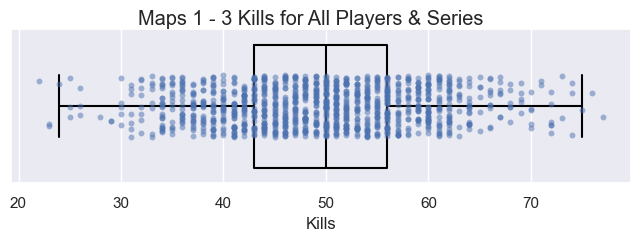

In [17]:
# Boxplot of Maps 1 - 3 Kills for All Players & Series

# Create figure
fig, axs = plt.subplots(figsize = (8, 2))

# Box Plot
sns.boxplot(data = map_1_thru_3_totals_df, x = "kills", showfliers = False, 
            fill = False, color = "black")
sns.stripplot(data = map_1_thru_3_totals_df, x = "kills", jitter = 0.2, 
              size = 4.25, color = '#4c72b0', alpha = 0.5)

# Styling
fig.suptitle("Maps 1 - 3 Kills for All Players & Series")
axs.set_xlabel("Kills")

Text(0, 0.5, 'Kills')

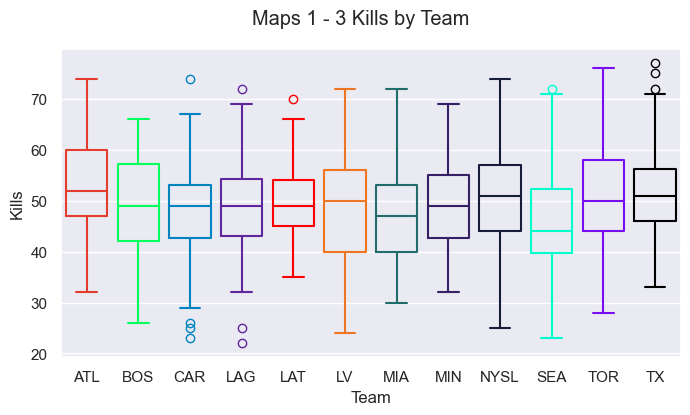

In [18]:
# Boxplot of Maps 1 - 3 Kills by Team

# Sort Maps 1 - 3 Kills by Team
queried_df = map_1_thru_3_totals_df.sort_values("team_abbr")

# Create figure
fig, axs = plt.subplots(figsize = (8, 4))

# Box Plot
sns.boxplot(data = queried_df, x = "team_abbr", y = "kills", 
            showfliers = True, fill = False, 
            hue = "team_abbr", hue_order = sorted(map_1_thru_3_totals_df["team_abbr"].unique()),
            legend = False, palette = team_colors_2)
            
# Styling
fig.suptitle("Maps 1 - 3 Kills by Team")
axs.set_xlabel("Team")
axs.set_ylabel("Kills")

<Axes: xlabel='team_abbr', ylabel='kills'>

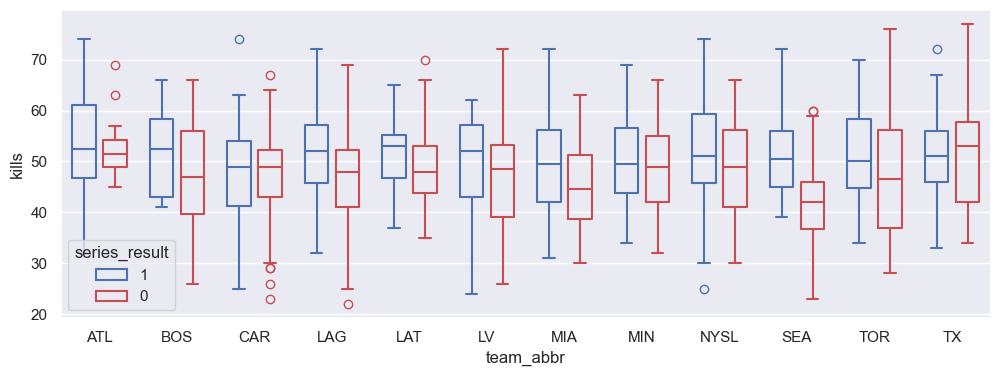

In [19]:
# Boxplot of Maps 1 - 3 Kills by Team & Series W/L

# Sort Maps 1 - 3 Kills by Team
queried_df = map_1_thru_3_totals_df.sort_values("team_abbr")

# Create figure
fig, axs = plt.subplots(figsize = (12, 4))

# Box Plot
sns.boxplot(data = queried_df, x = "team_abbr", y = "kills", 
            showfliers = True, fill = False, gap = 0.25,
            hue = "series_result", hue_order = [1, 0], 
            palette = ['#4c72b0', '#c44e52'])

In [20]:
# Compute Maps 1 - 3 Total Kills per Match for Individual Player
ghosty_df = map_1_thru_3_totals_df[map_1_thru_3_totals_df["player"] == "Ghosty"]
ghosty_df

,match_id,player,match_date,team_abbr,series_result,kills
12,27194,Ghosty,2023-12-08,LAT,0,38
76,27202,Ghosty,2023-12-10,LAT,0,52
99,27205,Ghosty,2023-12-15,LAT,1,46
158,27212,Ghosty,2023-12-17,LAT,0,49
212,27219,Ghosty,2024-01-13,LAT,0,47
242,27223,Ghosty,2024-01-14,LAT,0,43
316,27232,Ghosty,2024-01-21,LAT,1,57
394,27242,Ghosty,2024-02-18,LAT,0,61
442,27248,Ghosty,2024-02-24,LAT,1,59
530,27259,Ghosty,2024-03-03,LAT,1,49


Text(0.5, 0, 'Kills')

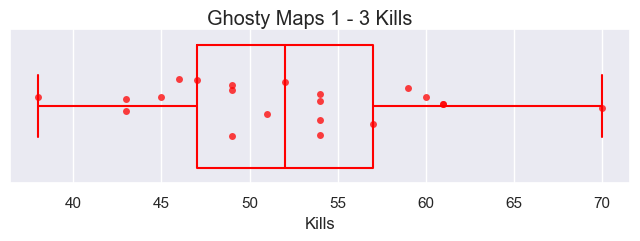

In [21]:
# Boxplot of Maps 1 - 3 Kills for Individual Player: Ghosty
# Create figure
fig, axs = plt.subplots(figsize = (8, 2))

# Box Plot
sns.boxplot(data = ghosty_df, x = "kills", showfliers = False, 
            fill = False, color = team_colors[4])
sns.stripplot(data = ghosty_df, x = "kills", jitter = 0.2, 
              color = team_colors[4], alpha = 0.75)

# Styling
fig.suptitle("Ghosty Maps 1 - 3 Kills")
axs.set_xlabel("Kills")

Text(0.5, 0.98, 'Ghosty Maps 1 - 3 Kills vs Time')

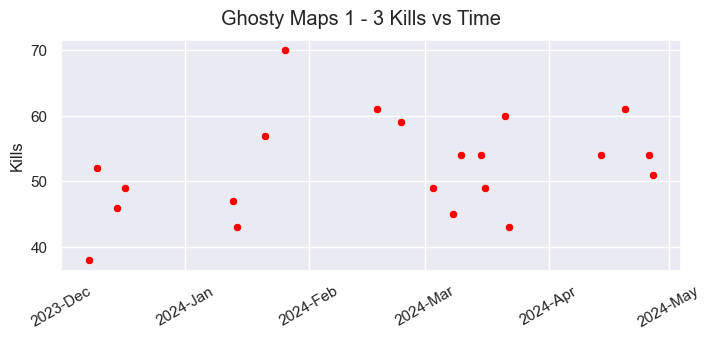

In [22]:
# Plot of Maps 1 - 3 Kills vs Time for Individual Player: Ghosty

# Create figure
fig, axs = plt.subplots(figsize = (8, 3))

# Scatterplot & Cur Line
sns.scatterplot(ghosty_df, x = 'match_date', y = 'kills', color = team_colors[4])

# Date Ticks
formatter = mdates.DateFormatter('%Y-%b')
axs.xaxis.set_major_formatter(formatter)
axs.tick_params(axis = 'x', rotation = 30)

# X- & Y-Axis Labels
axs.set_xlabel("")
axs.set_ylabel("Kills")

# Fig Title
fig.suptitle("Ghosty Maps 1 - 3 Kills vs Time")

In [23]:
# Filter updated_cdl_DF for Ghosty
ghosty_df = updated_cdl_DF[updated_cdl_DF["player"] == "Ghosty"]

Text(0, 0.5, 'Kills')

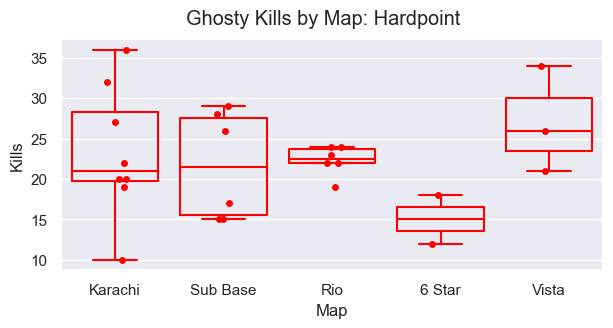

In [24]:
# Ghosty Box Plot of Kills by Map: Hardpoint

# Create figure
fig, axs = plt.subplots(figsize = (7, 3))

# Box Plot
sns.boxplot(data = ghosty_df[ghosty_df["gamemode"] == "Hardpoint"], 
            x = "map_name", y = "kills", fill = False, showfliers = False, color = team_colors[4])
sns.stripplot(data = ghosty_df[ghosty_df["gamemode"] == "Hardpoint"], 
              x = "map_name", y = "kills", jitter = 0.1, color = team_colors[4])

# Styling
fig.suptitle("Ghosty Kills by Map: Hardpoint")
axs.set_xlabel("Map")
axs.set_ylabel("Kills")

Text(0, 0.5, 'Kills')

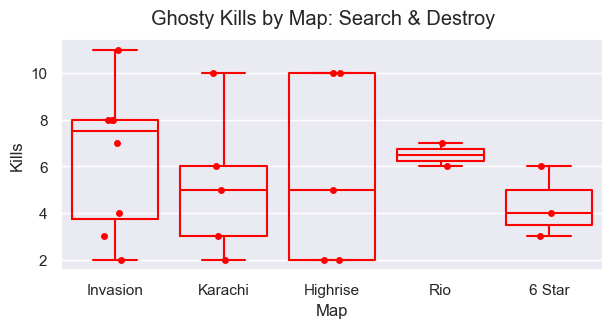

In [25]:
# Ghosty Box Plot of Kills by Map: Search & Destroy

# Create figure
fig, axs = plt.subplots(figsize = (7, 3))

# Box Plot
sns.boxplot(data = ghosty_df[ghosty_df["gamemode"] == "Search & Destroy"], 
            x = "map_name", y = "kills", fill = False, showfliers = False, color = team_colors[4])
sns.stripplot(data = ghosty_df[ghosty_df["gamemode"] == "Search & Destroy"], 
              x = "map_name", y = "kills", jitter = 0.1, color = team_colors[4])

# Styling
fig.suptitle("Ghosty Kills by Map: Search & Destroy")
axs.set_xlabel("Map")
axs.set_ylabel("Kills")

Text(0, 0.5, 'Kills')

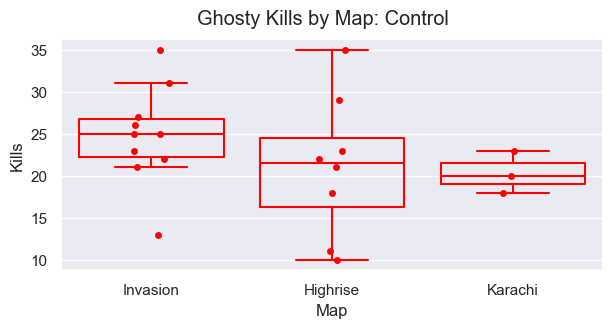

In [26]:
# Ghosty Box Plot of Kills by Map: Control

# Create figure
fig, axs = plt.subplots(figsize = (7, 3))

# Box Plot
sns.boxplot(data = ghosty_df[ghosty_df["gamemode"] == "Control"], 
            x = "map_name", y = "kills", fill = False, showfliers = False, color = team_colors[4])
sns.stripplot(data = ghosty_df[ghosty_df["gamemode"] == "Control"], 
              x = "map_name", y = "kills", jitter = 0.1, color = team_colors[4])

# Styling
fig.suptitle("Ghosty Kills by Map: Control")
axs.set_xlabel("Map")
axs.set_ylabel("Kills")

In [27]:
# Function to get list of match_ids containing user-selected map & mode for user-selected player
def get_match_ids(
    cdlDF_input: pd.DataFrame, player_input: str, 
    gamemode_input: str, map_input = str
):
    player_match_ids = cdlDF_input[
        (cdlDF_input['map_num'] <= 3) &
        (cdlDF_input['player'] == player_input) &
        (cdlDF_input['gamemode'] == gamemode_input) &
        (cdlDF_input['map_name'] == map_input)
    ][['match_id']]

    return player_match_ids['match_id'].to_list()

In [28]:
# Get all matches in which Ghosty played Invasion Control
get_match_ids(cdlDF, "Ghosty", "Control", "Invasion")

[27194, 27202, 27219, 27223, 27232, 27242, 27259, 52845, 27283, 27298]

In [29]:
# Conditional Probability of O/U when Map is Included in Series
def compute_ou_prob(     
    cdlDF_input: pd.DataFrame, player_input: str, 
    gamemode_input: str, cur_line: float, map_input = str
):
    player_match_ids = get_match_ids(cdlDF_input, player_input, gamemode_input, map_input)
    queried_df = cdlDF_input[
        (cdlDF_input['map_num'] <= 3) &
        (cdlDF_input['player'] == player_input) &
        (cdlDF_input['match_id'].isin(player_match_ids))
    ].groupby('match_id')['kills'].sum().reset_index()

    # Return empty strings if player_match_ids is empty
    if not player_match_ids:
        return "Never Played", "", "", "", ""

    # Compute overs, unders, and hooks
    overs = len(queried_df[queried_df['kills'] > cur_line])
    unders = len(queried_df[queried_df['kills'] < cur_line])
    hooks = len(queried_df[queried_df['kills'] == cur_line])

    # Compute over & under percentages
    over_percentage = int(round((overs / len(queried_df) * 100), 0))
    under_percentage = int(round((unders / len(queried_df) * 100), 0))
    
    # Return recommended bet based on percentages
    if over_percentage >= under_percentage:
        return "Over", str(over_percentage), str(overs), str(unders), str(hooks)
    else:
        return "Under", str(under_percentage), str(overs), str(unders), str(hooks)

In [30]:
# Dictionary of gamemode to Map # 1 - 3
gamemode_to_map_num = {
    "Hardpoint": "1", 
    "Search & Destroy": "2", 
    "Control": "3"
}

In [31]:
# Ghosty O/U % when Map 3 is Invasion Control: Full Season
player_input = "Ghosty"
cur_line = 52
gamemode_input = "Control"
map_input = "Invasion"

ou, percentage, overs, unders, hooks = compute_ou_prob(cdlDF, player_input, gamemode_input, cur_line, map_input)

print("Across the entire season,")
print(f"Ghosty has gone {ou} {cur_line} Maps 1 - 3 Kills in {percentage}% of series")
print(f"when map {gamemode_to_map_num[gamemode_input]} is {map_input} {gamemode_input}.")

Across the entire season,
Ghosty has gone Under 52 Maps 1 - 3 Kills in 50% of series
when map 3 is Invasion Control.


In [32]:
# Ghosty O/U % when Map 3 is Invasion Control: Major 3 Only
player_input = "Ghosty"
cur_line = 52
gamemode_input = "Control"
map_input = "Invasion"

ou, percentage, overs, unders, hooks = compute_ou_prob(major_3_df, player_input, gamemode_input, cur_line, map_input)

print("During the Major 3 Qualifiers,")
print(f"Ghosty has gone {ou} {cur_line} Maps 1 - 3 Kills in {percentage}% of series")
print(f"when map {gamemode_to_map_num[gamemode_input]} is {map_input} {gamemode_input}.")

During the Major 3 Qualifiers,
Ghosty has gone Over 52 Maps 1 - 3 Kills in 50% of series
when map 3 is Invasion Control.


In [33]:
# Loop through Full Season Map & Mode Combos to check for differences
# in Maps 1 - 3 O/U Probabiliites between Major 3 only & Full Season

player_input = "Ghosty"
cur_line = 52
gamemodes = []

print("")
print(f"{player_input}: Maps 1 - 3 Kills")
print("Full Season vs Major 3 Only")
print("-----------")

for index, row in full_season_map_mode_combos.iterrows():
    if row["gamemode"] not in gamemodes:
        gamemodes.append(row["gamemode"])
        print("")
        print(row["gamemode"])
    full_season = compute_ou_prob(cdlDF, player_input, row["gamemode"], cur_line, row["map_name"])
    major_3_only = compute_ou_prob(major_3_df, player_input, row["gamemode"], cur_line, row["map_name"])
    print(f"{row['map_name']}: {full_season[0]} {full_season[1]}% vs {major_3_only[0]} {major_3_only[1] + '%' if major_3_only[1] != '' else ''}")


Ghosty: Maps 1 - 3 Kills
Full Season vs Major 3 Only
-----------

Hardpoint
Karachi: Over 60% vs Over 100%
Rio: Under 67% vs Never Played 
Sub Base: Over 50% vs Never Played 

Search & Destroy
Highrise: Under 100% vs Under 100%
Invasion: Over 43% vs Never Played 
Karachi: Over 50% vs Never Played 
Rio: Over 100% vs Over 100%

Control
Highrise: Over 62% vs Over 100%
Invasion: Under 50% vs Over 50%
Karachi: Under 67% vs Never Played 


In [34]:
# Loop through Full Season Map & Mode Combos to check for differences
# in Maps 1 - 3 O/U Probabiliites between Major 3 only & Full Season

player_input = "HyDra"
cur_line = 55
gamemodes = []

print("")
print(f"{player_input}: Maps 1 - 3 Kills")
print("Full Season vs Major 3 Only")
print("-----------")

for index, row in full_season_map_mode_combos.iterrows():
    if row["gamemode"] not in gamemodes:
        gamemodes.append(row["gamemode"])
        print("")
        print(row["gamemode"])
    full_season = compute_ou_prob(cdlDF, player_input, row["gamemode"], cur_line, row["map_name"])
    major_3_only = compute_ou_prob(major_3_df, player_input, row["gamemode"], cur_line, row["map_name"])
    print(f"{row['map_name']}: {full_season[0]} {full_season[1]}% vs {major_3_only[0]} {major_3_only[1] + '%' if major_3_only[1] != '' else ''}")


HyDra: Maps 1 - 3 Kills
Full Season vs Major 3 Only
-----------

Hardpoint
Karachi: Over 57% vs Over 50%
Rio: Over 60% vs Under 100%
Sub Base: Over 60% vs Over 100%

Search & Destroy
Highrise: Over 75% vs Over 100%
Invasion: Over 71% vs Over 50%
Karachi: Over 71% vs Never Played 
Rio: Over 100% vs Over 100%

Control
Highrise: Over 60% vs Over 50%
Invasion: Over 78% vs Over 67%
Karachi: Over 57% vs Never Played 


## 3. Map Popularity Analysis

In [35]:
# Compute Total Number of Matches
number_of_matches = len(cdlDF["match_id"].unique())
number_of_matches

148

In [36]:
# Value Counts for all Map & Mode Combos
all_map_mode_value_counts = cdlDF[['match_id', 'gamemode', 'map_name']].drop_duplicates() \
    .groupby(['gamemode', 'map_name'], observed = True).size().reset_index(name='count') \
    .sort_values(['gamemode', 'count'], ignore_index = True, ascending = [True, False])
all_map_mode_value_counts

,gamemode,map_name,count
0,Hardpoint,Karachi,48
1,Hardpoint,Invasion,45
2,Hardpoint,Skidrow,37
3,Hardpoint,Sub Base,37
4,Hardpoint,Rio,36
5,Hardpoint,Terminal,16
6,Hardpoint,6 Star,11
7,Hardpoint,Vista,11
8,Search & Destroy,Invasion,55
9,Search & Destroy,Karachi,44


In [37]:
# Check value counts by adding control totals: one control per match, 
# so sum of control totals should equal total number of matches
all_map_mode_value_counts['count'][-3:].sum()

148

Text(0, 0.5, 'Map')

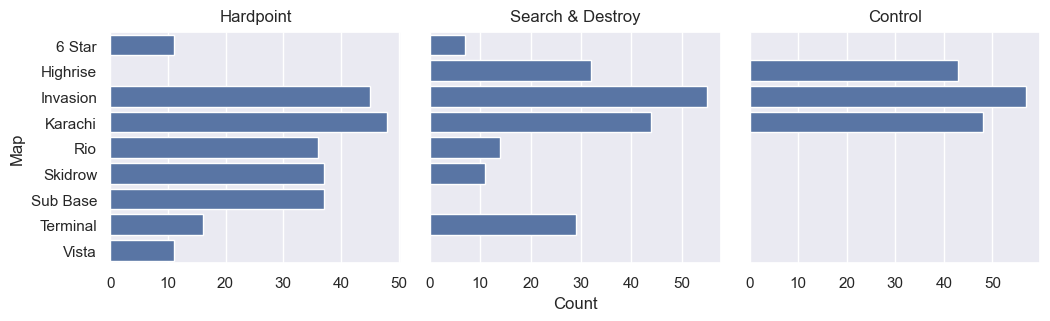

In [38]:
# Faceted Histograms of Map & Mode Value Counts for Full Season
queried_df = all_map_mode_value_counts.sort_values(['gamemode', 'map_name'], ignore_index = True)

# Create figure with gridspec
f, axs = plt.subplots(1, 3, figsize = (12, 3), gridspec_kw = dict(wspace = 0.1), sharey = True)

# Bar Plots
sns.barplot(
    queried_df[queried_df["gamemode"] == "Hardpoint"], 
    x = "count", y = "map_name", errorbar = None, ax = axs[0], 
    order = sorted(queried_df['map_name'].unique())
)

sns.barplot(
    queried_df[queried_df["gamemode"] == "Search & Destroy"], 
    x = "count", y = "map_name", errorbar = None, ax = axs[1], 
    order = sorted(queried_df['map_name'].unique())
)

sns.barplot(
    queried_df[queried_df["gamemode"] == "Control"], 
    x = "count", y = "map_name", errorbar = None, ax = axs[2], 
    order = sorted(queried_df['map_name'].unique())
)

# Styling
axs[0].set_title("Hardpoint", fontsize = 12, pad = 8)
axs[1].set_title("Search & Destroy", fontsize = 12, pad = 8)
axs[2].set_title("Control", fontsize = 12, pad = 8)

axs[0].set_xlabel("")
axs[1].set_xlabel("Count")
axs[2].set_xlabel("")

axs[0].set_ylabel("Map")

In [39]:
# Compute Total Number of Matches during Major 3
major_3_matches = len(major_3_df["match_id"].unique())
major_3_matches

28

In [40]:
# Value Counts for all Major 3 Map & Mode Combos
major_3_map_mode_value_counts = major_3_df[['match_id', 'gamemode', 'map_name']].drop_duplicates() \
    .groupby(['gamemode', 'map_name'], observed = True).size().reset_index(name='count') \
    .sort_values(['gamemode', 'count'], ignore_index = True, ascending = [True, False])
major_3_map_mode_value_counts

,gamemode,map_name,count
0,Hardpoint,6 Star,11
1,Hardpoint,Vista,11
2,Hardpoint,Karachi,10
3,Hardpoint,Rio,9
4,Hardpoint,Sub Base,4
5,Search & Destroy,Highrise,10
6,Search & Destroy,Invasion,9
7,Search & Destroy,6 Star,7
8,Search & Destroy,Rio,7
9,Search & Destroy,Karachi,5


In [41]:
# Check value counts by adding control totals: one control per match, 
# so sum of control totals should equal total number of matches
major_3_map_mode_value_counts['count'][-3:].sum()

28

Text(0, 0.5, 'Map')

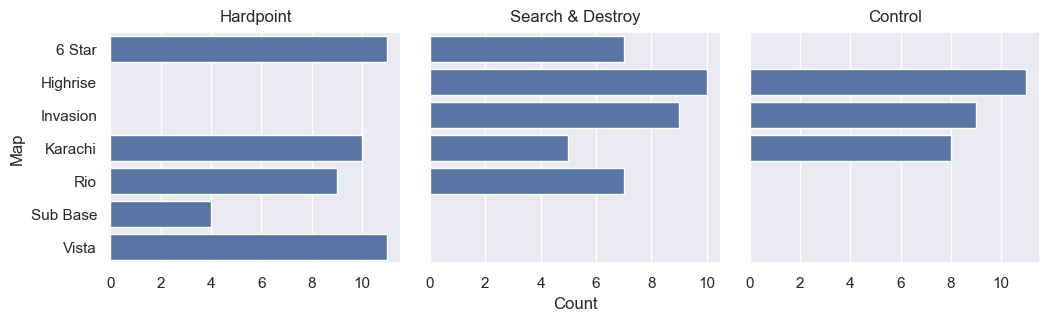

In [42]:
# Faceted Histograms of Map & Mode Value Counts for Major 3 

queried_df = major_3_map_mode_value_counts.sort_values(['gamemode', 'map_name'], ignore_index = True)

# Create figure with gridspec
f, axs = plt.subplots(1, 3, figsize = (12, 3), gridspec_kw = dict(wspace = 0.1), sharey = True)

# Bar Plots
sns.barplot(
    queried_df[queried_df["gamemode"] == "Hardpoint"], 
    x = "count", y = "map_name", errorbar = None, ax = axs[0], 
    order = sorted(queried_df['map_name'].unique())
)

sns.barplot(
    queried_df[queried_df["gamemode"] == "Search & Destroy"], 
    x = "count", y = "map_name", errorbar = None, ax = axs[1], 
    order = sorted(queried_df['map_name'].unique())
)

sns.barplot(
    queried_df[queried_df["gamemode"] == "Control"], 
    x = "count", y = "map_name", errorbar = None, ax = axs[2], 
    order = sorted(queried_df['map_name'].unique())
)

# Styling
axs[0].set_title("Hardpoint", fontsize = 12, pad = 8)
axs[1].set_title("Search & Destroy", fontsize = 12, pad = 8)
axs[2].set_title("Control", fontsize = 12, pad = 8)

axs[0].set_xlabel("")
axs[1].set_xlabel("Count")
axs[2].set_xlabel("")

axs[0].set_ylabel("Map")

In [43]:
# Hardpoint Value Counts Map 1 vs Map 4: Full Season
full_season_hp_value_counts = cdlDF \
    [cdlDF['gamemode'] == 'Hardpoint'] \
    [['match_id', 'map_name', 'map_num']].drop_duplicates() \
    .groupby(['map_num', 'map_name'], observed = True).size().reset_index(name='count') \
    .sort_values(['map_num', 'count'], ignore_index = True, ascending = [True, False])

full_season_hp_value_counts_pivot = full_season_hp_value_counts \
    .pivot(index = 'map_name', columns = 'map_num', values = 'count')

full_season_hp_value_counts_pivot = full_season_hp_value_counts_pivot.reset_index().rename_axis(columns={'map_num': ''})

full_season_hp_value_counts_pivot

,map_name,1,4
0,6 Star,8,3
1,Invasion,29,16
2,Karachi,36,12
3,Rio,20,16
4,Skidrow,22,15
5,Sub Base,19,18
6,Terminal,7,9
7,Vista,7,4


In [44]:
# Hardpoint Value Counts Map 1 vs Map 4: Major 3 Only
major_3_hp_value_counts = major_3_df \
    [major_3_df['gamemode'] == 'Hardpoint'] \
    [['match_id', 'map_name', 'map_num']].drop_duplicates() \
    .groupby(['map_num', 'map_name'], observed = True).size().reset_index(name='count') \
    .sort_values(['map_num', 'count'], ignore_index = True, ascending = [True, False])

major_3_hp_value_counts_pivot = major_3_hp_value_counts \
    .pivot(index = 'map_name', columns = 'map_num', values = 'count')

major_3_hp_value_counts_pivot = major_3_hp_value_counts_pivot.reset_index().rename_axis(columns={'map_num': ''})

major_3_hp_value_counts_pivot

,map_name,1,4
0,6 Star,8,3
1,Karachi,7,3
2,Rio,4,5
3,Sub Base,2,2
4,Vista,7,4


In [45]:
# Hardpoint Value Counts Map 1 vs Map 4: Removed Maps

queried_df = pd.merge(removed_map_mode_combos, cdlDF, on=['gamemode', 'map_name'], how='left').reset_index(drop = True)

removed_hp_value_counts = queried_df \
    [queried_df['gamemode'] == 'Hardpoint'] \
    [['match_id', 'map_name', 'map_num']].drop_duplicates() \
    .groupby(['map_num', 'map_name'], observed = True).size().reset_index(name='count') \
    .sort_values(['map_num', 'count'], ignore_index = True, ascending = [True, False])

removed_hp_value_counts_pivot = removed_hp_value_counts \
    .pivot(index = 'map_name', columns = 'map_num', values = 'count')

removed_hp_value_counts_pivot = removed_hp_value_counts_pivot.reset_index().rename_axis(columns={'map_num': ''})

removed_hp_value_counts_pivot

,map_name,1,4
0,Invasion,29,16
1,Skidrow,22,15
2,Terminal,7,9


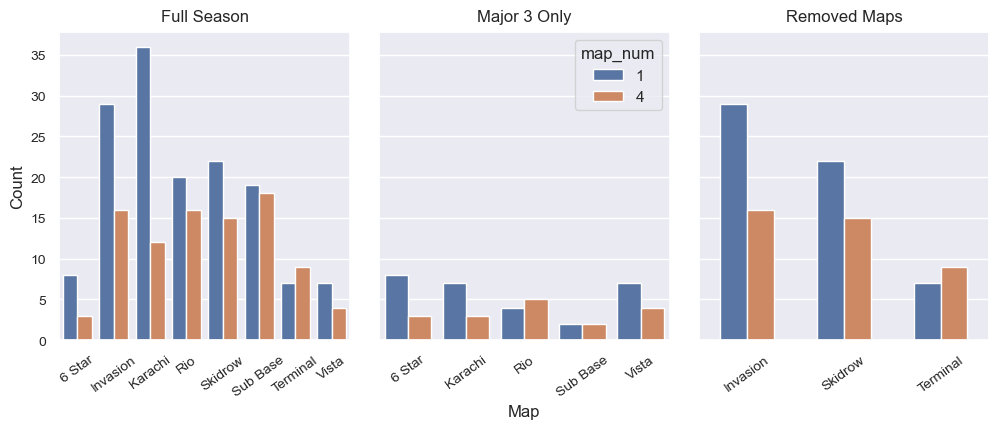

In [46]:
# Faceted Histograms of Hardpoint Value Counts Map 1 vs Map 4 by Group

# Sort Value Counts
full_season_hp_value_counts = full_season_hp_value_counts.sort_values(["map_num", "map_name"]).reset_index(drop = True)
major_3_hp_value_counts = major_3_hp_value_counts.sort_values(["map_num", "map_name"]).reset_index(drop = True)
removed_hp_value_counts = removed_hp_value_counts.sort_values(["map_num", "map_name"]).reset_index(drop = True)

# Create figure with gridspec
f, axs = plt.subplots(1, 3, figsize = (12, 4), gridspec_kw = dict(wspace = 0.1), sharey = True)

# Bar Plots
sns.barplot(
    full_season_hp_value_counts, hue = "map_num", dodge = True,
    x = "map_name", y = "count", errorbar = None, ax = axs[0], 
    legend = False, palette = "deep"
)

sns.barplot(
    major_3_hp_value_counts, hue = "map_num", dodge = True,
    x = "map_name", y = "count", errorbar = None, ax = axs[1], 
    palette = "deep"
)

sns.barplot(
    removed_hp_value_counts, hue = "map_num", dodge = True, 
    x = "map_name", y = "count", errorbar = None, ax = axs[2], 
    legend = False, palette = "deep", width = 0.55
)

# Styling
axs[0].set_title("Full Season", fontsize = 12, pad = 8)
axs[1].set_title("Major 3 Only", fontsize = 12, pad = 8)
axs[2].set_title("Removed Maps", fontsize = 12, pad = 8)

axs[0].set_xlabel("")
axs[1].set_xlabel("Map")
axs[2].set_xlabel("")

axs[0].set_ylabel("Count")

axs[0].tick_params(axis = 'x', rotation = 36, labelsize = 10)
axs[1].tick_params(axis = 'x', rotation = 36, labelsize = 10)
axs[2].tick_params(axis = 'x', rotation = 36, labelsize = 10)

axs[0].tick_params(axis = 'y', labelsize = 10)

In [47]:
# Search & Destroy Value Counts Map 2 vs Map 5: Full Season
full_season_snd_value_counts = cdlDF \
    [cdlDF['gamemode'] == 'Search & Destroy'] \
    [['match_id', 'map_name', 'map_num']].drop_duplicates() \
    .groupby(['map_num', 'map_name'], observed = True).size().reset_index(name='count') \
    .sort_values(['map_num', 'count'], ignore_index = True, ascending = [True, False])

full_season_snd_value_counts_pivot = full_season_snd_value_counts \
    .pivot(index = 'map_name', columns = 'map_num', values = 'count')

full_season_snd_value_counts_pivot = full_season_snd_value_counts_pivot.reset_index().rename_axis(columns={'map_num': ''})

full_season_snd_value_counts_pivot

,map_name,2,5
0,6 Star,2,5
1,Highrise,25,7
2,Invasion,45,10
3,Karachi,34,10
4,Rio,12,2
5,Skidrow,8,3
6,Terminal,22,7


In [48]:
# Search & Destroy Value Counts Map 2 vs Map 5: Major 3 Only
major_3_snd_value_counts = major_3_df \
    [major_3_df['gamemode'] == 'Search & Destroy'] \
    [['match_id', 'map_name', 'map_num']].drop_duplicates() \
    .groupby(['map_num', 'map_name'], observed = True).size().reset_index(name='count') \
    .sort_values(['map_num', 'count'], ignore_index = True, ascending = [True, False])

major_3_snd_value_counts_pivot = major_3_snd_value_counts \
    .pivot(index = 'map_name', columns = 'map_num', values = 'count')

major_3_snd_value_counts_pivot = major_3_snd_value_counts_pivot.reset_index().rename_axis(columns={'map_num': ''})

major_3_snd_value_counts_pivot = major_3_snd_value_counts_pivot.fillna(0)

major_3_snd_value_counts_pivot[2] = major_3_snd_value_counts_pivot[2].astype(int)
major_3_snd_value_counts_pivot[5] = major_3_snd_value_counts_pivot[5].astype(int)

major_3_snd_value_counts_pivot

,map_name,2,5
0,6 Star,2,5
1,Highrise,7,3
2,Invasion,8,1
3,Karachi,4,1
4,Rio,7,0


In [49]:
# Search & Destroy Value Counts Map 2 vs Map 5: Removed Maps

queried_df = pd.merge(removed_map_mode_combos, cdlDF, on=['gamemode', 'map_name'], how='left').reset_index(drop = True)

removed_snd_value_counts = queried_df \
    [queried_df['gamemode'] == 'Search & Destroy'] \
    [['match_id', 'map_name', 'map_num']].drop_duplicates() \
    .groupby(['map_num', 'map_name'], observed = True).size().reset_index(name='count') \
    .sort_values(['map_num', 'count'], ignore_index = True, ascending = [True, False])

removed_snd_value_counts_pivot = removed_snd_value_counts \
    .pivot(index = 'map_name', columns = 'map_num', values = 'count')

removed_snd_value_counts_pivot = removed_snd_value_counts_pivot.reset_index().rename_axis(columns={'map_num': ''})

removed_snd_value_counts_pivot

,map_name,2,5
0,Skidrow,8,3
1,Terminal,22,7


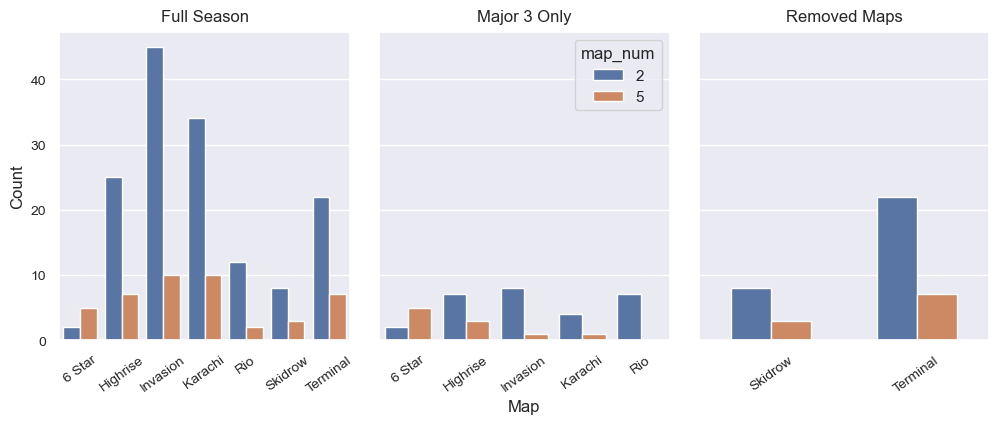

In [50]:
# Faceted Histograms of Search & Destroy Value Counts Map 2 vs Map 5 by Group

# Sort Value Counts
full_season_snd_value_counts = full_season_snd_value_counts.sort_values(["map_num", "map_name"]).reset_index(drop = True)
major_3_snd_value_counts = major_3_snd_value_counts.sort_values(["map_num", "map_name"]).reset_index(drop = True)
removed_snd_value_counts = removed_snd_value_counts.sort_values(["map_num", "map_name"]).reset_index(drop = True)

# Create figure with gridspec
f, axs = plt.subplots(1, 3, figsize = (12, 4), gridspec_kw = dict(wspace = 0.1), sharey = True)

# Bar Plots
sns.barplot(
    full_season_snd_value_counts, hue = "map_num", dodge = True,
    x = "map_name", y = "count", errorbar = None, ax = axs[0], 
    legend = False, palette = "deep"
)

sns.barplot(
    major_3_snd_value_counts, hue = "map_num", dodge = True,
    x = "map_name", y = "count", errorbar = None, ax = axs[1], 
    palette = "deep"
)

sns.barplot(
    removed_snd_value_counts, hue = "map_num", dodge = True, 
    x = "map_name", y = "count", errorbar = None, ax = axs[2], 
    legend = False, palette = "deep", width = 0.55
)

# Styling
axs[0].set_title("Full Season", fontsize = 12, pad = 8)
axs[1].set_title("Major 3 Only", fontsize = 12, pad = 8)
axs[2].set_title("Removed Maps", fontsize = 12, pad = 8)

axs[0].set_xlabel("")
axs[1].set_xlabel("Map")
axs[2].set_xlabel("")

axs[0].set_ylabel("Count")

axs[0].tick_params(axis = 'x', rotation = 36, labelsize = 10)
axs[1].tick_params(axis = 'x', rotation = 36, labelsize = 10)
axs[2].tick_params(axis = 'x', rotation = 36, labelsize = 10)

axs[0].tick_params(axis = 'y', labelsize = 10)

In [51]:
# Ratio of Map 1s to Map 4s
map_1s = len(cdlDF[cdlDF["map_num"] == 1]["match_id"].unique())
map_4s = len(cdlDF[cdlDF["map_num"] == 4]["match_id"].unique())

print("Full Season")
print("-------------")
print("")
print(f"Map 1s   Map 4s   Ratio")
print(f"{map_1s}      {map_4s}       {map_1s / map_4s:.2f}")

Full Season
-------------

Map 1s   Map 4s   Ratio
148      93       1.59


In [52]:
# Compute ratio of Map 1s to Map 4s for each Hardpoint Map: Full Season
full_season_hp_value_counts_pivot['ratio'] = full_season_hp_value_counts_pivot[1] / full_season_hp_value_counts_pivot[4]
full_season_hp_value_counts_pivot['ratio'] = full_season_hp_value_counts_pivot['ratio'].round(2)

full_season_hp_value_counts_pivot

,map_name,1,4,ratio
0,6 Star,8,3,2.67
1,Invasion,29,16,1.81
2,Karachi,36,12,3.00
3,Rio,20,16,1.25
4,Skidrow,22,15,1.47
5,Sub Base,19,18,1.06
6,Terminal,7,9,0.78
7,Vista,7,4,1.75


In [53]:
# Ratio of Map 1s to Map 4s after filtering for maps
map_1s = len(updated_cdl_DF[updated_cdl_DF["map_num"] == 1]["match_id"].unique())
map_4s = len(updated_cdl_DF[updated_cdl_DF["map_num"] == 4]["match_id"].unique())

print("Filtered Map Pool")
print("-------------")
print("")
print(f"Map 1s   Map 4s   Ratio")
print(f"{map_1s}       {map_4s}       {map_1s / map_4s:.2f}")

Filtered Map Pool
-------------

Map 1s   Map 4s   Ratio
90       53       1.70


In [54]:
# Ratio of Map 1s to Map 4s: Major 3 Only
map_1s = len(major_3_df[major_3_df["map_num"] == 1]["match_id"].unique())
map_4s = len(major_3_df[major_3_df["map_num"] == 4]["match_id"].unique())

print("Major 3 Only")
print("-------------")
print("")
print(f"Map 1s   Map 4s   Ratio")
print(f"{map_1s}       {map_4s}       {map_1s / map_4s:.2f}")

Major 3 Only
-------------

Map 1s   Map 4s   Ratio
28       17       1.65


In [55]:
# Compute ratio of Map 1s to Map 4s for each Hardpoint Map: Major 3 Only
major_3_hp_value_counts_pivot['ratio'] = major_3_hp_value_counts_pivot[1] / major_3_hp_value_counts_pivot[4]
major_3_hp_value_counts_pivot['ratio'] = major_3_hp_value_counts_pivot['ratio'].round(2)

major_3_hp_value_counts_pivot

,map_name,1,4,ratio
0,6 Star,8,3,2.67
1,Karachi,7,3,2.33
2,Rio,4,5,0.80
3,Sub Base,2,2,1.00
4,Vista,7,4,1.75


In [56]:
# Ratio of Map 2s to Map 5s
map_2s = len(cdlDF[cdlDF["map_num"] == 2]["match_id"].unique())
map_5s = len(cdlDF[cdlDF["map_num"] == 5]["match_id"].unique())

print("Full Season")
print("-------------")
print("")
print(f"Map 2s   Map 5s   Ratio")
print(f"{map_2s}      {map_5s}       {map_2s / map_5s:.2f}")

Full Season
-------------

Map 2s   Map 5s   Ratio
148      44       3.36


In [57]:
# Compute ratio of Map 2s to Map 5s for each Search & Destroyo Map: Full Season
full_season_snd_value_counts_pivot['ratio'] = full_season_snd_value_counts_pivot[2] / full_season_snd_value_counts_pivot[5]
full_season_snd_value_counts_pivot['ratio'] = full_season_snd_value_counts_pivot['ratio'].round(2)

full_season_snd_value_counts_pivot

,map_name,2,5,ratio
0,6 Star,2,5,0.40
1,Highrise,25,7,3.57
2,Invasion,45,10,4.50
3,Karachi,34,10,3.40
4,Rio,12,2,6.00
5,Skidrow,8,3,2.67
6,Terminal,22,7,3.14


In [58]:
# Ratio of Maps 2s to Map 5s after filtering for maps
map_2s = len(updated_cdl_DF[updated_cdl_DF["map_num"] == 2]["match_id"].unique())
map_5s = len(updated_cdl_DF[updated_cdl_DF["map_num"] == 5]["match_id"].unique())

print("Filtered Map Pool")
print("-------------")
print("")
print(f"Map 2s   Map 5s   Ratio")
print(f"{map_2s}      {map_5s}       {map_2s / map_5s:.2f}")

Filtered Map Pool
-------------

Map 2s   Map 5s   Ratio
118      34       3.47


In [59]:
# Ratio of Map 2s to Map 5s: Stage 3 Only
map_2s = len(major_3_df[major_3_df["map_num"] == 2]["match_id"].unique())
map_5s = len(major_3_df[major_3_df["map_num"] == 5]["match_id"].unique())

print("Major 3 Only")
print("-------------")
print("")
print(f"Map 2s   Map 5s   Ratio")
print(f"{map_2s}       {map_5s}        {map_2s / map_5s:.2f}")

Major 3 Only
-------------

Map 2s   Map 5s   Ratio
28       10        2.80


In [60]:
# Compute ratio of Map 2s to Map 5s for each Hardpoint Map: Major 3 Only
major_3_snd_value_counts_pivot['ratio'] = major_3_snd_value_counts_pivot[2] / major_3_snd_value_counts_pivot[5]
major_3_snd_value_counts_pivot['ratio'] = major_3_snd_value_counts_pivot['ratio'].round(2)

major_3_snd_value_counts_pivot

,map_name,2,5,ratio
0,6 Star,2,5,0.40
1,Highrise,7,3,2.33
2,Invasion,8,1,8.00
3,Karachi,4,1,4.00
4,Rio,7,0,inf


Text(0.5, 0, '')

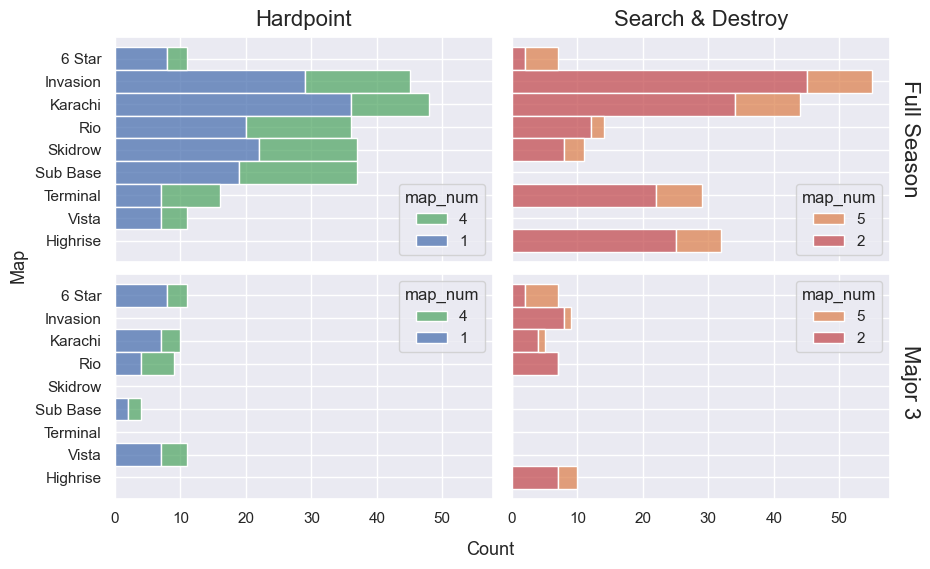

In [61]:
# Evaluate distribution of HP & SnD Maps Across Maps 1 - 2 vs Maps 4 - 5: Full Season & Major 3 Only
full_season_df = cdlDF[cdlDF["gamemode"] != "Control"] \
    [["match_id", "gamemode", "map_name", "map_num"]] \
        .drop_duplicates() \
        .sort_values("map_name")

cur_major_df = major_3_df[major_3_df["gamemode"] != "Control"] \
    [["match_id", "gamemode", "map_name", "map_num"]] \
        .drop_duplicates() \
        .sort_values("map_name")

# Create figure with gridspec
f, axs = plt.subplots(2, 2, figsize = (10, 6), gridspec_kw = dict(wspace = 0.05, hspace = 0.05), sharex = True, sharey = True)

# Histograms with Discrete Bins
sns.histplot(full_season_df[full_season_df["gamemode"] == "Hardpoint"], 
            y = "map_name", multiple = "stack", discrete = True,
            hue = "map_num", hue_order = [4, 1],
            palette = ["#55a868", "#4c72b0"], ax = axs[0, 0])

sns.histplot(full_season_df[full_season_df["gamemode"] == "Search & Destroy"], 
            y = "map_name", multiple = "stack", discrete = True,
            hue = "map_num", hue_order = [5, 2],
            palette = ["#dd8452", "#c44e52"], ax = axs[0, 1])

sns.histplot(cur_major_df[cur_major_df["gamemode"] == "Hardpoint"], 
            y = "map_name", multiple = "stack", discrete = True,
            hue = "map_num", hue_order = [4, 1],
            palette = ["#55a868", "#4c72b0"], ax = axs[1, 0])

sns.histplot(cur_major_df[cur_major_df["gamemode"] == "Search & Destroy"], 
            y = "map_name", multiple = "stack", discrete = True,
            hue = "map_num", hue_order = [5, 2],
            palette = ["#dd8452", "#c44e52"], ax = axs[1, 1])

# Styling
axs[0, 0].set_title("Hardpoint", fontsize = 16, pad = 8)
axs[0, 1].set_title("Search & Destroy", fontsize = 16, pad = 8)

f.supxlabel('Count', fontsize = 13)
f.supylabel('Map', fontsize = 13)

plt.figtext(.91, 0.25, "Major 3", rotation = 270, fontsize = 16) 
plt.figtext(.91, 0.62, "Full Season", rotation = 270, fontsize = 16) 

axs[0, 0].set_ylabel("")
axs[1, 0].set_ylabel("")
axs[1, 0].set_xlabel("")
axs[1, 1].set_xlabel("")

# 4. Old Maps Analysis

In [62]:
# Lists of removed maps by mode
removed_hp_maps = ['Invasion', 'Skidrow', 'Terminal']
removed_snd_maps = ['Skidrow', 'Terminal']

C:\Users\David Harler Jr\AppData\Local\Temp\ipykernel_19596\694652368.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_yticklabels(['Before Major 3', 'Major 3'])


Text(0, 0.5, '')

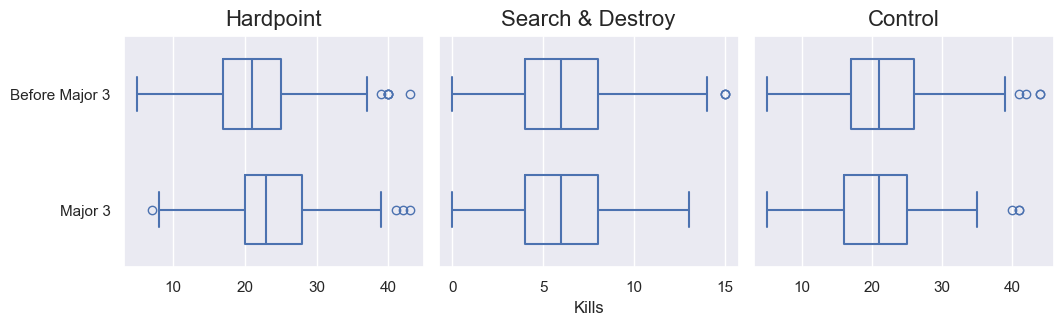

In [63]:
# Boxplot of Kills by Mode: Before Major 3 vs During Major 3

# Add indicator column
cdlDF['before_major_3'] = cdlDF["match_date"].apply(lambda x: x < np.datetime64('2024-04-12')).astype(int).astype(str)

# Create figure with gridspec
f, axs = plt.subplots(1, 3, figsize = (12, 3), gridspec_kw = dict(wspace = 0.05), sharey = True)

# Box Plot: Hardpoint
sns.boxplot(data = cdlDF[cdlDF['gamemode'] == 'Hardpoint'],
            y = "before_major_3", x = "kills", ax = axs[0],
            showfliers = True, fill = False, gap = 0.25)


# Box Plot: Search & Destroy
sns.boxplot(data = cdlDF[cdlDF['gamemode'] == 'Search & Destroy'],
            y = "before_major_3", x = "kills", ax = axs[1],
            showfliers = True, fill = False, gap = 0.25)

# Box Plot: Control
sns.boxplot(data = cdlDF[cdlDF['gamemode'] == 'Control'],
            y = "before_major_3", x = "kills", ax = axs[2],
            showfliers = True, fill = False, gap = 0.25)

# Styling
axs[0].set_title("Hardpoint", fontsize = 16, pad = 8)
axs[1].set_title("Search & Destroy", fontsize = 16, pad = 8)
axs[2].set_title("Control", fontsize = 16, pad = 8)

axs[0].set_yticklabels(['Before Major 3', 'Major 3']) 

axs[0].set_xlabel("")
axs[1].set_xlabel("Kills")
axs[2].set_xlabel("")
axs[0].set_ylabel("")

Text(0, 0.5, 'Map')

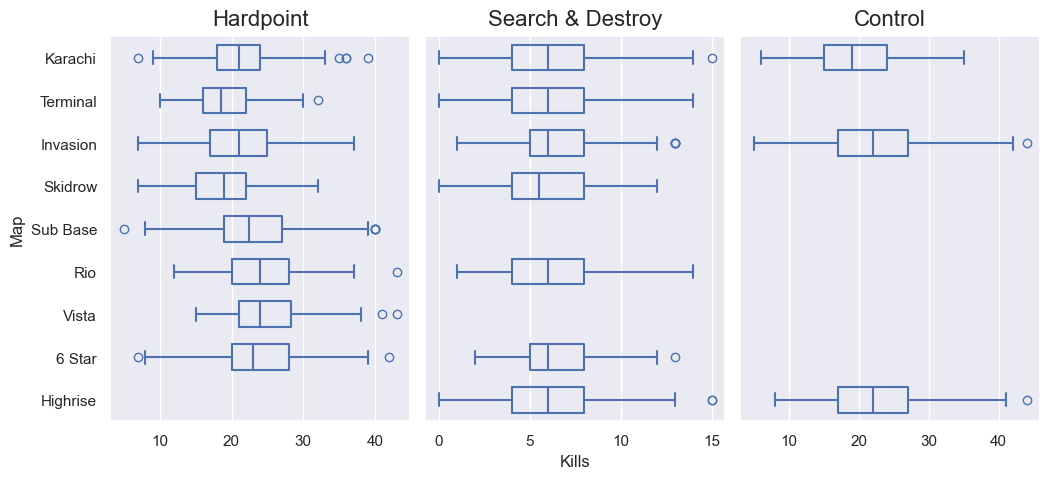

In [64]:
# Boxplot of Kills by Map & Mode

# Create figure with gridspec
f, axs = plt.subplots(1, 3, figsize = (12, 5), gridspec_kw = dict(wspace = 0.05), sharey = True)

# Box Plot: Hardpoint
sns.boxplot(data = cdlDF[cdlDF['gamemode'] == 'Hardpoint'],
            y = "map_name", x = "kills", ax = axs[0],
            showfliers = True, fill = False, gap = 0.25)

# Box Plot: Search & Destroy
sns.boxplot(data = cdlDF[cdlDF['gamemode'] == 'Search & Destroy'],
            y = "map_name", x = "kills", ax = axs[1],
            showfliers = True, fill = False, gap = 0.25)

# Box Plot: Control
sns.boxplot(data = cdlDF[cdlDF['gamemode'] == 'Control'],
            y = "map_name", x = "kills", ax = axs[2],
            showfliers = True, fill = False, gap = 0.25)

# Styling
axs[0].set_title("Hardpoint", fontsize = 16, pad = 8)
axs[1].set_title("Search & Destroy", fontsize = 16, pad = 8)
axs[2].set_title("Control", fontsize = 16, pad = 8)

axs[0].set_xlabel("")
axs[1].set_xlabel("Kills")
axs[2].set_xlabel("")
axs[0].set_ylabel("Map")

### Note: 
Terminal and Skidrow Hardpoint are the only Hardpoint maps with a median
of less than 20 kills

In [65]:
# Define a function to check if map_name is in the list of old maps for the respective game mode
def is_old_map(row):    
    if row['gamemode'] == 'Hardpoint':
        return row['map_name'] in removed_hp_maps
    elif row['gamemode'] == 'Search & Destroy':
        return row['map_name'] in removed_snd_maps
    else:
        return False  # Assuming all other game modes are not old maps

# Add a new column 'old_map' based on the function
cdlDF['is_old_map'] = cdlDF.apply(is_old_map, axis=1).astype(int).astype(str)
cdlDF

,match_id,match_date,player,team,map_num,map_name,gamemode,kills,team_score,map_result,...,team_abbr,team_icon,opp,opp_abbr,opp_score,total_score,score_diff,dummy_x,before_major_3,is_old_map
0,27193,2023-12-08,aBeZy,Atlanta FaZe,1,Karachi,Hardpoint,24,250,1,...,ATL,FaZe,Boston Breach,BOS,238,488,12,0,1,0
1,27193,2023-12-08,Cellium,Atlanta FaZe,1,Karachi,Hardpoint,21,250,1,...,ATL,FaZe,Boston Breach,BOS,238,488,12,0,1,0
2,27193,2023-12-08,Drazah,Atlanta FaZe,1,Karachi,Hardpoint,25,250,1,...,ATL,FaZe,Boston Breach,BOS,238,488,12,0,1,0
3,27193,2023-12-08,Simp,Atlanta FaZe,1,Karachi,Hardpoint,33,250,1,...,ATL,FaZe,Boston Breach,BOS,238,488,12,0,1,0
4,27193,2023-12-08,Capsidal,Boston Breach,1,Karachi,Hardpoint,24,238,0,...,BOS,Breach,Atlanta FaZe,ATL,250,488,-12,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4643,27304,2024-05-03,Simp,Atlanta FaZe,3,Highrise,Control,20,3,1,...,ATL,FaZe,Las Vegas Legion,LV,0,3,3,0,0,0
4644,27304,2024-05-03,Asim,Las Vegas Legion,3,Highrise,Control,13,0,0,...,LV,Legion,Atlanta FaZe,ATL,3,3,-3,0,0,0
4645,27304,2024-05-03,Attach,Las Vegas Legion,3,Highrise,Control,12,0,0,...,LV,Legion,Atlanta FaZe,ATL,3,3,-3,0,0,0
4646,27304,2024-05-03,Gio,Las Vegas Legion,3,Highrise,Control,16,0,0,...,LV,Legion,Atlanta FaZe,ATL,3,3,-3,0,0,0


C:\Users\David Harler Jr\AppData\Local\Temp\ipykernel_19596\3679053743.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_yticklabels(['Current Maps', 'Old Maps'])


Text(0, 0.5, '')

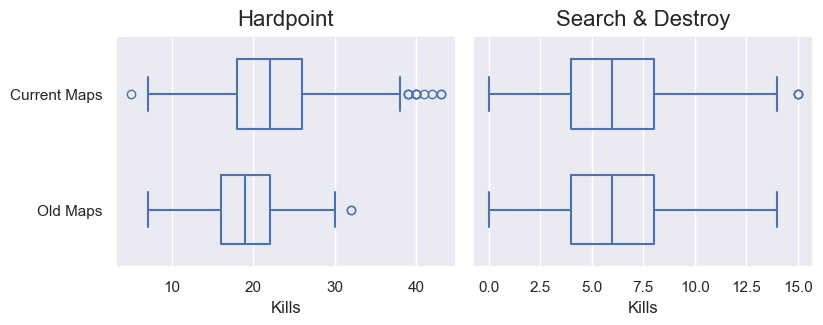

In [144]:
# Boxplots of Kills by Mode: Old Maps vs Current Maps

# Create figure with gridspec
f, axs = plt.subplots(1, 2, figsize = (9, 3), gridspec_kw = dict(wspace = 0.05), sharey = True)

# Box Plots: Hardpoint
sns.boxplot(data = cdlDF[cdlDF['gamemode'] == 'Hardpoint'],
            y = "is_old_map", x = "kills", ax = axs[0],
            showfliers = True, fill = False, gap = 0.25)


# Box Plots: Search & Destroy
sns.boxplot(data = cdlDF[cdlDF['gamemode'] == 'Search & Destroy'],
            y = "is_old_map", x = "kills", ax = axs[1],
            showfliers = True, fill = False, gap = 0.25)

# Styling
axs[0].set_title("Hardpoint", fontsize = 16, pad = 8)
axs[1].set_title("Search & Destroy", fontsize = 16, pad = 8)

axs[0].set_yticklabels(['Current Maps', 'Old Maps']) 

axs[0].set_xlabel("Kills")
axs[1].set_xlabel("Kills")
axs[0].set_ylabel("")

### Conclusion: 
Old HPs vs. Current HPs create the only statistically significant impact on Maps 1 - 3 Kills

Text(0, 0.5, 'Kills')

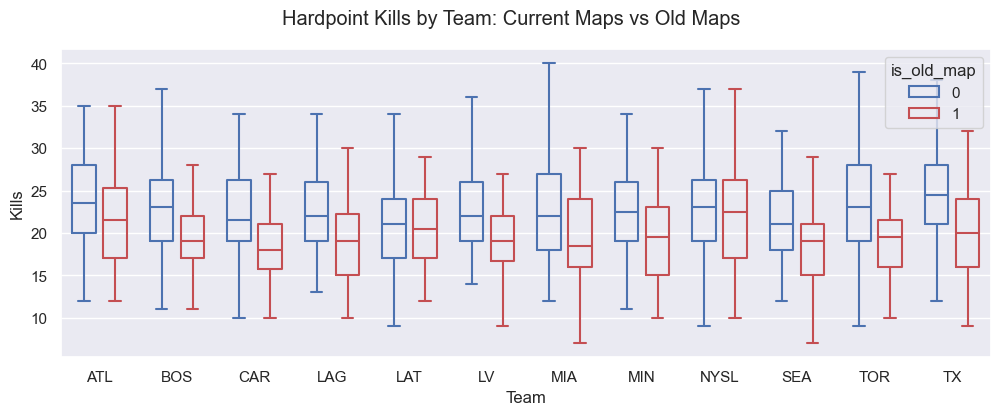

In [67]:
# Boxplots of Hardpoint Kills by Team: Old Maps vs Current Maps

# Filter cdlDF for Hardpoint Only and sort by team
queried_df = cdlDF[cdlDF['gamemode'] == 'Hardpoint'].sort_values("team_abbr")

# Create figure
fig, axs = plt.subplots(figsize = (12, 4))

# Box Plot
sns.boxplot(data = queried_df, x = "team_abbr", y = "kills", 
            showfliers = False, fill = False, gap = 0.25,
            hue = "is_old_map", hue_order = ["0", "1"],
            palette = ['#4c72b0', '#c44e52']
)

# Styling
fig.suptitle("Hardpoint Kills by Team: Current Maps vs Old Maps")

axs.set_xlabel("Team")
axs.set_ylabel("Kills")

Text(0, 0.5, 'Kills')

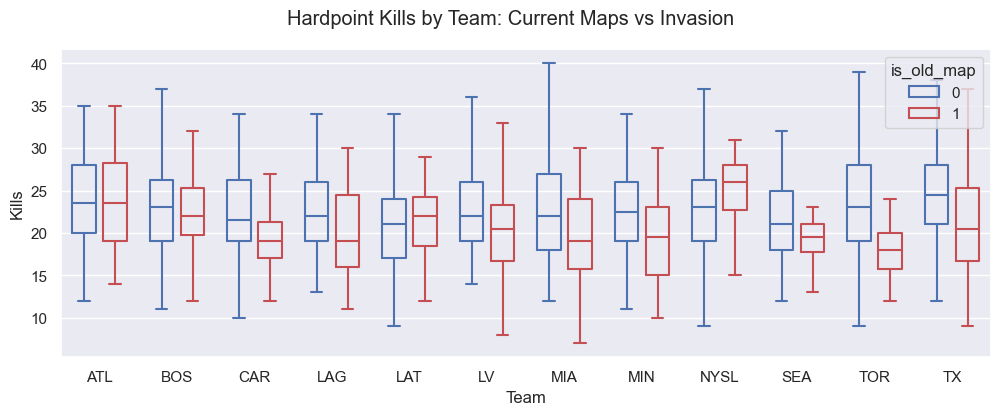

In [68]:
# Boxplots of Hardpoint Kills by Team: Current Maps vs. Invasion

# Filter cdlDF for Hardpoint Only and sort by team
queried_df = cdlDF[
    (cdlDF['gamemode'] == 'Hardpoint') & 
    (cdlDF['map_name'] != 'Skidrow') & 
    (cdlDF['map_name'] != 'Terminal')
    ].sort_values("team_abbr")

# Create figure
fig, axs = plt.subplots(figsize = (12, 4))

# Box Plot
sns.boxplot(data = queried_df, x = "team_abbr", y = "kills", 
            showfliers = False, fill = False, gap = 0.25,
            hue = "is_old_map", hue_order = ["0", "1"],
            palette = ['#4c72b0', '#c44e52']
)

# Styling
fig.suptitle("Hardpoint Kills by Team: Current Maps vs Invasion")

axs.set_xlabel("Team")
axs.set_ylabel("Kills")

Text(0, 0.5, 'Kills')

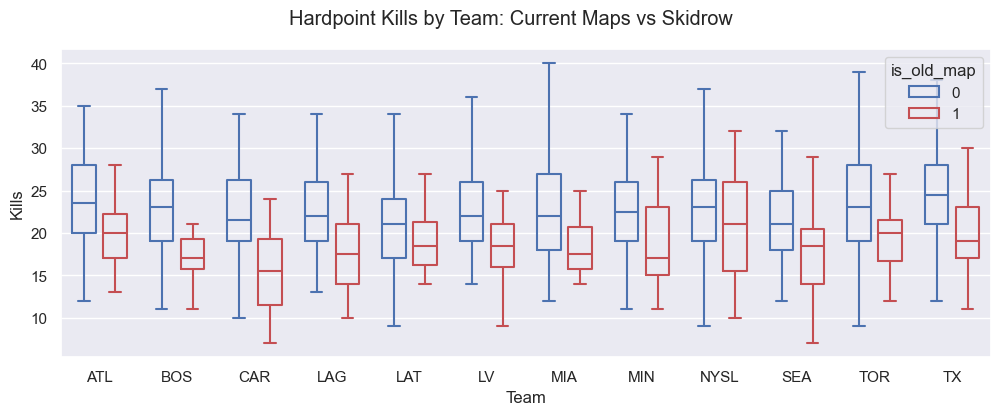

In [69]:
# Boxplots of Hardpoint Kills by Team: Current Maps vs. Skidrow

# Filter cdlDF for Hardpoint Only and sort by team
queried_df = cdlDF[
    (cdlDF['gamemode'] == 'Hardpoint') & 
    (cdlDF['map_name'] != 'Invasion') & 
    (cdlDF['map_name'] != 'Terminal')
    ].sort_values("team_abbr")

# Create figure
fig, axs = plt.subplots(figsize = (12, 4))

# Box Plot
sns.boxplot(data = queried_df, x = "team_abbr", y = "kills", 
            showfliers = False, fill = False, gap = 0.25,
            hue = "is_old_map", hue_order = ["0", "1"],
            palette = ['#4c72b0', '#c44e52']
)

# Styling
fig.suptitle("Hardpoint Kills by Team: Current Maps vs Skidrow")

axs.set_xlabel("Team")
axs.set_ylabel("Kills")

Text(0, 0.5, 'Kills')

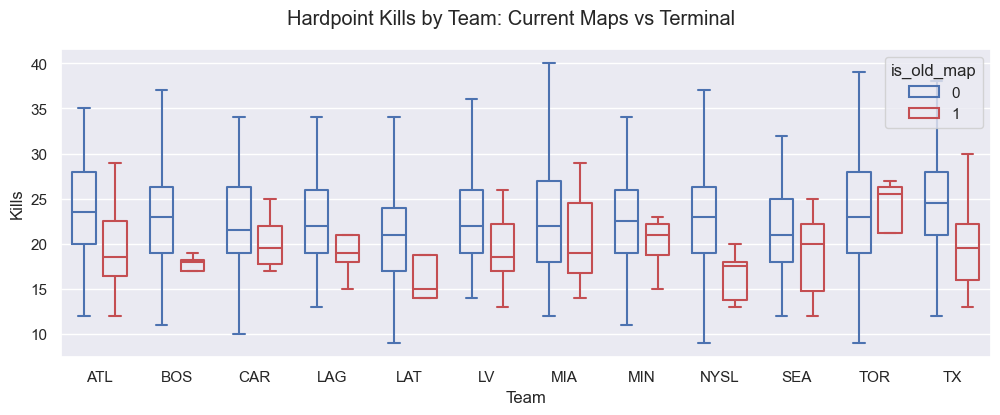

In [70]:
# Boxplots of Hardpoint Kills by Team: Current Maps vs. Terminal

# Filter cdlDF for Hardpoint Only and sort by team
queried_df = cdlDF[
    (cdlDF['gamemode'] == 'Hardpoint') & 
    (cdlDF['map_name'] != 'Invasion') & 
    (cdlDF['map_name'] != 'Skidrow')
    ].sort_values("team_abbr")

# Create figure
fig, axs = plt.subplots(figsize = (12, 4))

# Box Plot
sns.boxplot(data = queried_df, x = "team_abbr", y = "kills", 
            showfliers = False, fill = False, gap = 0.25,
            hue = "is_old_map", hue_order = ["0", "1"],
            palette = ['#4c72b0', '#c44e52']
)

# Styling
fig.suptitle("Hardpoint Kills by Team: Current Maps vs Terminal")

axs.set_xlabel("Team")
axs.set_ylabel("Kills")

Text(0, 0.5, 'Kills')

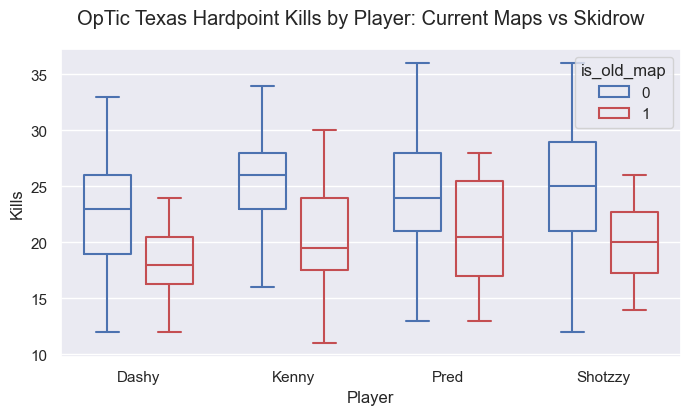

In [71]:
# OpTic Texas Boxplots of Hardpoint Kills by Player: Current Maps vs. Skidrow

# Filter cdlDF for Hardpoint Only and sort by team
queried_df = cdlDF[
    (cdlDF['gamemode'] == 'Hardpoint') & 
    (cdlDF['map_name'] != 'Invasion') & 
    (cdlDF['map_name'] != 'Terminal') &
    (cdlDF['team_abbr'] == 'TX')
    ].sort_values("player")

# Create figure
fig, axs = plt.subplots(figsize = (8, 4))

# Box Plot
sns.boxplot(data = queried_df, x = "player", y = "kills", 
            showfliers = False, fill = False, gap = 0.25,
            hue = "is_old_map", hue_order = ["0", "1"],
            palette = ['#4c72b0', '#c44e52']
)

# Styling
fig.suptitle("OpTic Texas Hardpoint Kills by Player: Current Maps vs Skidrow")

axs.set_xlabel("Player")
axs.set_ylabel("Kills")

Text(0, 0.5, 'Kills')

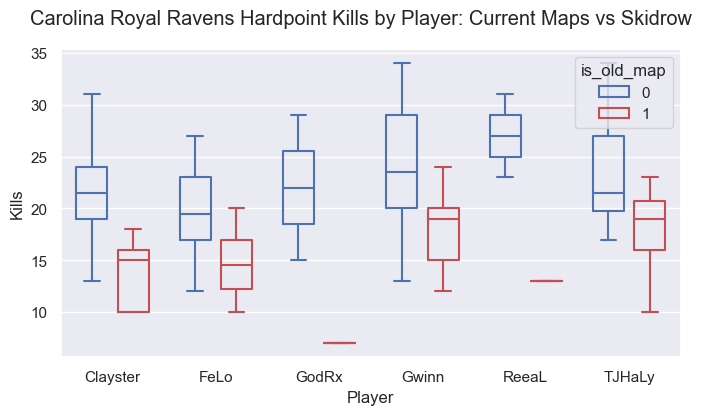

In [72]:
# Carolina Royal Ravens Boxplots of Hardpoint Kills by Player: Current Maps vs. Skidrow

# Filter cdlDF for Hardpoint Only and sort by team
queried_df = cdlDF[
    (cdlDF['gamemode'] == 'Hardpoint') & 
    (cdlDF['map_name'] != 'Invasion') & 
    (cdlDF['map_name'] != 'Terminal') &
    (cdlDF['team_abbr'] == 'CAR')
    ].sort_values("player")

# Create figure
fig, axs = plt.subplots(figsize = (8, 4))

# Box Plot
sns.boxplot(data = queried_df, x = "player", y = "kills", 
            showfliers = False, fill = False, gap = 0.25,
            hue = "is_old_map", hue_order = ["0", "1"],
            palette = ['#4c72b0', '#c44e52']
)

# Styling
fig.suptitle("Carolina Royal Ravens Hardpoint Kills by Player: Current Maps vs Skidrow")

axs.set_xlabel("Player")
axs.set_ylabel("Kills")

Text(0, 0.5, 'Kills')

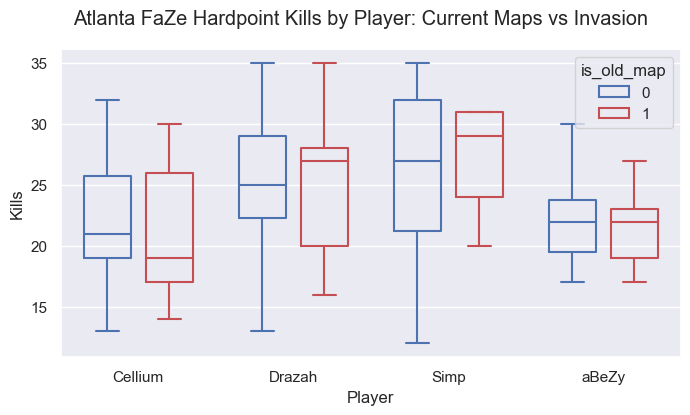

In [73]:
# Atlanta FaZe Boxplots of Hardpoint Kills by Player: Current Maps vs. Invasion

# Filter cdlDF for Hardpoint Only and sort by team
queried_df = cdlDF[
    (cdlDF['gamemode'] == 'Hardpoint') & 
    (cdlDF['map_name'] != 'Skidrow') & 
    (cdlDF['map_name'] != 'Terminal') &
    (cdlDF['team_abbr'] == 'ATL')
    ].sort_values("player")

# Create figure
fig, axs = plt.subplots(figsize = (8, 4))

# Box Plot
sns.boxplot(data = queried_df, x = "player", y = "kills", 
            showfliers = False, fill = False, gap = 0.25,
            hue = "is_old_map", hue_order = ["0", "1"],
            palette = ['#4c72b0', '#c44e52']
)

# Styling
fig.suptitle("Atlanta FaZe Hardpoint Kills by Player: Current Maps vs Invasion")

axs.set_xlabel("Player")
axs.set_ylabel("Kills")

Text(0, 0.5, 'Team')

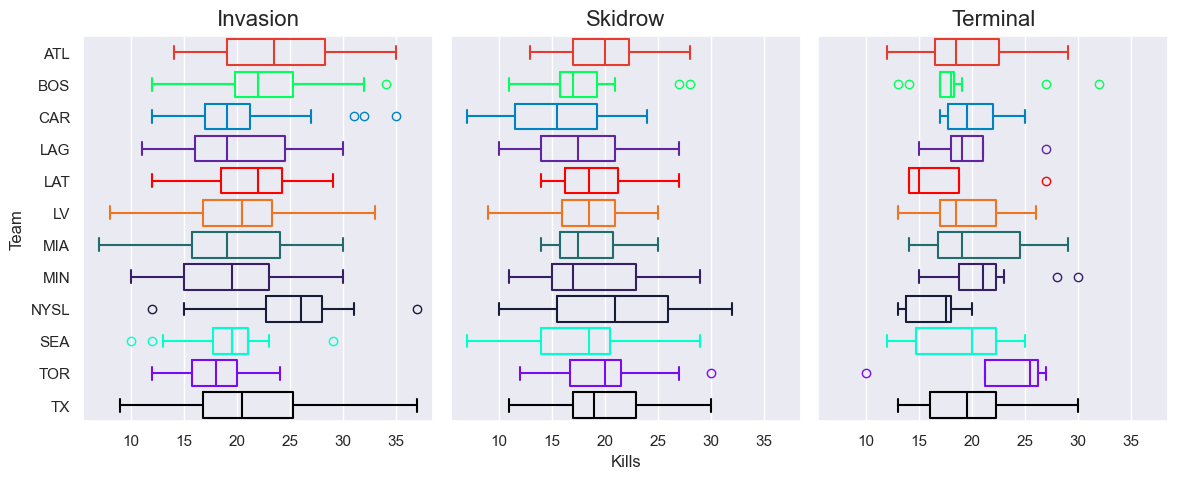

In [74]:
# Boxplots of Old Hardpoint Map Kills by Team & Map

# Get kills for Invasion, Skidrow, and Terminal HP
invasion_df = cdlDF[(cdlDF['gamemode'] == 'Hardpoint') &
                   (cdlDF['map_name'] == 'Invasion')] \
                   .sort_values('team_abbr')

skidrow_df = cdlDF[(cdlDF['gamemode'] == 'Hardpoint') &
                   (cdlDF['map_name'] == 'Skidrow')] \
                   .sort_values('team_abbr')

terminal_df = cdlDF[(cdlDF['gamemode'] == 'Hardpoint') &
                   (cdlDF['map_name'] == 'Terminal')] \
                   .sort_values('team_abbr')

# Create figure
f, axs = plt.subplots(1, 3, figsize = (14, 5), gridspec_kw = dict(wspace = 0.05), sharex = True, sharey = True)

# Box Plots
sns.boxplot(data = invasion_df, y = "team_abbr", x = "kills", 
            showfliers = True, fill = False, color = 'black', 
            ax =axs[0], hue = "team_abbr", palette = team_colors_2, 
            legend = False, hue_order = sorted(cdlDF["team_abbr"].unique()))
# sns.stripplot(data = invasion_df, y = "team_abbr", x = "kills", 
#               jitter = 0.2, size = 4.25, alpha = 0.5, 
#               color = '#4c72b0', ax =axs[0])

sns.boxplot(data = skidrow_df, y = "team_abbr", x = "kills", 
            showfliers = True, fill = False, color = 'black', 
            ax =axs[1], hue = "team_abbr", palette = team_colors_2, 
            legend = False, hue_order = sorted(cdlDF["team_abbr"].unique()))
# sns.stripplot(data = skidrow_df, y = "team_abbr", x = "kills", 
#               jitter = 0.2, size = 4.25, alpha = 0.5, 
#               color = '#4c72b0', ax =axs[1])

sns.boxplot(data = terminal_df, y = "team_abbr", x = "kills", 
            showfliers = True, fill = False, color = 'black', 
            ax =axs[2], hue = "team_abbr", palette = team_colors_2, 
            legend = False, hue_order = sorted(cdlDF["team_abbr"].unique()))
# sns.stripplot(data = terminal_df, y = "team_abbr", x = "kills", 
#               jitter = 0.2, size = 4.25, alpha = 0.5, 
#               color = '#4c72b0', ax =axs[2])

# Styling
axs[0].set_title("Invasion", fontsize = 16, pad = 8)
axs[1].set_title("Skidrow", fontsize = 16, pad = 8)
axs[2].set_title("Terminal", fontsize = 16, pad = 8)

axs[0].set_xlabel("")
axs[1].set_xlabel("Kills")
axs[2].set_xlabel("")
axs[0].set_ylabel("Team")

# 5. Series with Old Map on Map 1 or Map 2

In [75]:
# Total Number of Series with Old Map on Map 1 or 2
series_with_old_maps_list = pd.merge(
    removed_map_mode_combos, 
    cdlDF[cdlDF['map_num'] < 4], 
    on = ["gamemode", "map_name"])['match_id'].unique()
print("# of Series with Old Maps   Percentage")
print(f"{len(series_with_old_maps_list)}                          {round(len(series_with_old_maps_list) / number_of_matches, 3) * 100}%")

# of Series with Old Maps   Percentage
72                          48.6%


In [76]:
# Check work by getting total number of match_ids with an old_map played during maps 1 - 3
len(cdlDF[
        (cdlDF['is_old_map'] == "1") & 
        (cdlDF['map_num'] <= 3)
    ]['match_id'].unique())

72

In [77]:
# Series with Old Maps Dataframe
series_with_old_maps_DF = cdlDF[cdlDF['match_id'].isin(series_with_old_maps_list)] \
    [['match_id', 'map_num', 'map_name']] \
    .drop_duplicates() \
    .pivot(index = 'match_id', columns = 'map_num', values = 'map_name')

series_with_old_maps_DF = series_with_old_maps_DF.reset_index().rename_axis(columns={'map_num': ''})
series_with_old_maps_DF["is_old_map_1?"] = series_with_old_maps_DF[1].apply(lambda x: x in removed_hp_maps).astype(int)
series_with_old_maps_DF["is_old_map_2?"] = series_with_old_maps_DF[2].apply(lambda x: x in removed_snd_maps).astype(int)
series_with_old_maps_DF["is_old_map_4?"] = series_with_old_maps_DF[4].apply(lambda x: x in removed_hp_maps).astype(int)
series_with_old_maps_DF["is_old_map_5?"] = series_with_old_maps_DF[5].apply(lambda x: x in removed_snd_maps).astype(int)
series_with_old_maps_DF["total_old_maps"] = \
    series_with_old_maps_DF[['is_old_map_1?', 'is_old_map_2?', 'is_old_map_4?', 'is_old_map_5?']].sum(axis=1)
series_with_old_maps_DF["total_maps"] = \
    series_with_old_maps_DF[[1, 2, 3, 4, 5]].notna().sum(axis=1)

series_with_old_maps_DF = \
    series_with_old_maps_DF.sort_values(
        ["total_maps", "total_old_maps", "is_old_map_1?", 1, "is_old_map_2?", 2, 
        "is_old_map_4?", 4, "is_old_map_5?", 5], 
        ascending = [False, False, False, True, False, True, 
        False, True, False, True]) \
        .reset_index(drop = True)

series_with_old_maps_DF

,match_id,1,2,3,4,5,is_old_map_1?,is_old_map_2?,is_old_map_4?,is_old_map_5?,total_old_maps,total_maps
0,27259,Invasion,Invasion,Invasion,Skidrow,Terminal,1,0,1,1,3,5
1,27220,Skidrow,Terminal,Highrise,Terminal,Invasion,1,1,1,0,3,5
2,27200,Invasion,Terminal,Invasion,Karachi,Invasion,1,1,0,0,2,5
3,27231,Skidrow,Highrise,Karachi,Sub Base,Skidrow,1,0,0,1,2,5
4,27230,Skidrow,Invasion,Karachi,Terminal,Karachi,1,0,1,0,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...
67,27229,Terminal,Invasion,Karachi,NaN,NaN,1,0,0,0,1,3
68,27213,Terminal,Karachi,Highrise,NaN,NaN,1,0,0,0,1,3
69,27275,Karachi,Terminal,Invasion,NaN,NaN,0,1,0,0,1,3
70,27210,Sub Base,Skidrow,Karachi,NaN,NaN,0,1,0,0,1,3


In [78]:
# Check work to ensure that either map 1 is old or map 2 is old
min(series_with_old_maps_DF[['is_old_map_1?', 'is_old_map_2?']].sum(axis=1))

1

In [79]:
# Check series with with 3 old maps
series_with_old_maps_DF[series_with_old_maps_DF['total_old_maps'] == 3]

,match_id,1,2,3,4,5,is_old_map_1?,is_old_map_2?,is_old_map_4?,is_old_map_5?,total_old_maps,total_maps
0,27259,Invasion,Invasion,Invasion,Skidrow,Terminal,1,0,1,1,3,5
1,27220,Skidrow,Terminal,Highrise,Terminal,Invasion,1,1,1,0,3,5
21,27199,Invasion,Terminal,Invasion,Terminal,NaN,1,1,1,0,3,4


In [80]:
# Compute totals
series_3_old_maps = len(series_with_old_maps_DF[series_with_old_maps_DF['total_old_maps'] == 3])
series_2_old_maps = len(series_with_old_maps_DF[series_with_old_maps_DF['total_old_maps'] == 2])
series_1_old_map = len(series_with_old_maps_DF[series_with_old_maps_DF['total_old_maps'] == 1])

print("3 Old Maps    2 Old Maps    1 Old Map")
print(f"{series_3_old_maps}             {series_2_old_maps}            {series_1_old_map}")

3 Old Maps    2 Old Maps    1 Old Map
3             34            35


In [81]:
# Compute Combos: 1 Old Map
old_hp = len(series_with_old_maps_DF[
    (series_with_old_maps_DF['total_old_maps'] == 1) & 
    (series_with_old_maps_DF['is_old_map_1?'] == 1)
])

old_snd = len(series_with_old_maps_DF[
    (series_with_old_maps_DF['total_old_maps'] == 1) & 
    (series_with_old_maps_DF['is_old_map_2?'] == 1)
])

print("One Old HP    One Old Search")
print(f"{old_hp}            {old_snd}")

One Old HP    One Old Search
28            7


In [82]:
# Compute Combos: 2 Old Maps
two_old_hps = len(series_with_old_maps_DF[
    (series_with_old_maps_DF['total_old_maps'] == 2) & 
    (series_with_old_maps_DF['is_old_map_1?'] == 1) &
    (series_with_old_maps_DF['is_old_map_4?'] == 1)
])

two_old_snds = len(series_with_old_maps_DF[
    (series_with_old_maps_DF['total_old_maps'] == 2) & 
    (series_with_old_maps_DF['is_old_map_2?'] == 1) &
    (series_with_old_maps_DF['is_old_map_5?'] == 1)
])

one_hp_one_search = series_2_old_maps - two_old_hps - two_old_snds

print("2 Old HPs    1 HP, 1 Search    2 Old Searchs")
print(f"{two_old_hps}           {one_hp_one_search}                {two_old_snds}")

2 Old HPs    1 HP, 1 Search    2 Old Searchs
10           24                0


In [83]:
# Compute number of series with old maps for each team
old_maps_per_team = pd.merge(
    series_with_old_maps_DF[['match_id', 'total_old_maps']], 
    cdlDF[['match_id', 'team']].drop_duplicates(), 
    on = 'match_id'
) \
    .groupby(['team', 'total_old_maps']) \
    .size().reset_index(name = 'counts') \
    .pivot(index = 'team', columns = 'total_old_maps', values = 'counts')

old_maps_per_team = old_maps_per_team.reset_index().rename_axis(columns={'total_old_maps': ''})
old_maps_per_team = old_maps_per_team.fillna(0)
old_maps_per_team[[1, 2, 3]] = old_maps_per_team[[1, 2, 3]].astype(int)
old_maps_per_team['total'] = old_maps_per_team[[1, 2, 3]].sum(axis=1)
old_maps_per_team

,team,1,2,3,total
0,Atlanta FaZe,4,8,0,12
1,Boston Breach,7,6,1,14
2,Carolina Royal Ravens,6,6,0,12
3,Las Vegas Legion,5,8,1,14
4,Los Angeles Guerrillas,4,3,0,7
5,Los Angeles Thieves,6,3,1,10
6,Miami Heretics,6,4,0,10
7,Minnesota ROKKR,9,6,1,16
8,New York Subliners,5,6,0,11
9,OpTic Texas,8,8,1,17


In [84]:
# Check work by summimg total column and dividing by 2
old_maps_per_team['total'].sum() / 2

72.0

### Series with old Map 1 HP

In [85]:
# More importantly, series with one or two old HPs
series_with_old_HP = series_with_old_maps_DF[
    (series_with_old_maps_DF['is_old_map_1?'] == 1) |
    (series_with_old_maps_DF['is_old_map_4?'] == 1)
].drop(['is_old_map_2?', 'is_old_map_5?', 'total_old_maps'], axis = 1)

series_with_old_HP['total_old_HPs'] = series_with_old_HP[['is_old_map_1?', 'is_old_map_4?']].sum(axis=1)
series_with_old_HP["total_HPs"] = \
    series_with_old_HP[[1, 4]].notna().sum(axis=1)
series_with_old_HP = series_with_old_HP.drop([2, 3, 5, 'total_maps'], axis = 1)
series_with_old_HP = series_with_old_HP \
    .sort_values(['total_old_HPs', 'is_old_map_1?', 1, 'is_old_map_4?', 4], 
                 ascending = [True, False, True, False, True]) \
    .reset_index(drop = True)

# Remove series where only old HP is map 4
index_to_drop = series_with_old_HP[
    (series_with_old_HP['is_old_map_1?'] == 0) & 
    (series_with_old_HP['is_old_map_4?'] == 1)
    ].index

# Drop the rows with the obtained index
series_with_old_HP.drop(index_to_drop, inplace=True)

# Reset index after dropping rows if needed
series_with_old_HP.reset_index(drop=True, inplace=True)

# Total number of series with at least one old Hardpoint
len(series_with_old_HP)

58

In [86]:
# Check work by adding combinations from above
old_hp + two_old_hps + one_hp_one_search + series_3_old_maps - 7

58

In [87]:
# Series with two old HPs
series_with_old_HP[series_with_old_HP['total_old_HPs'] == 2]

,match_id,1,4,is_old_map_1?,is_old_map_4?,total_old_HPs,total_HPs
45,27259,Invasion,Skidrow,1,1,2,2
46,27203,Invasion,Skidrow,1,1,2,2
47,27218,Invasion,Skidrow,1,1,2,2
48,35651,Invasion,Skidrow,1,1,2,2
49,27199,Invasion,Terminal,1,1,2,2
50,27233,Skidrow,Invasion,1,1,2,2
51,52932,Skidrow,Invasion,1,1,2,2
52,27220,Skidrow,Terminal,1,1,2,2
53,27230,Skidrow,Terminal,1,1,2,2
54,27206,Skidrow,Terminal,1,1,2,2


In [88]:
# Series with one old HP
series_with_old_HP[series_with_old_HP['total_old_HPs'] == 1]

,match_id,1,4,is_old_map_1?,is_old_map_4?,total_old_HPs,total_HPs
0,27200,Invasion,Karachi,1,0,1,2
1,27237,Invasion,Karachi,1,0,1,2
2,53372,Invasion,Karachi,1,0,1,2
3,27219,Invasion,Karachi,1,0,1,2
4,52845,Invasion,Rio,1,0,1,2
5,27245,Invasion,Rio,1,0,1,2
6,27255,Invasion,Rio,1,0,1,2
7,27266,Invasion,Rio,1,0,1,2
8,27250,Invasion,Sub Base,1,0,1,2
9,52933,Invasion,Sub Base,1,0,1,2


In [89]:
# Function to check if an old Map 1 HP is replaceable
def is_map_1_hp_replaceable(row):    
    if pd.notna(row[4]):
        return row[4] not in removed_hp_maps
    else:
        return False

# Add a new column 'old_map' based on the function
series_with_old_HP['is_map_1_replaceable?'] = \
    series_with_old_HP.apply(is_map_1_hp_replaceable, axis=1).astype(int)

series_with_old_HP

,match_id,1,4,is_old_map_1?,is_old_map_4?,total_old_HPs,total_HPs,is_map_1_replaceable?
0,27200,Invasion,Karachi,1,0,1,2,1
1,27237,Invasion,Karachi,1,0,1,2,1
2,53372,Invasion,Karachi,1,0,1,2,1
3,27219,Invasion,Karachi,1,0,1,2,1
4,52845,Invasion,Rio,1,0,1,2,1
5,27245,Invasion,Rio,1,0,1,2,1
6,27255,Invasion,Rio,1,0,1,2,1
7,27266,Invasion,Rio,1,0,1,2,1
8,27250,Invasion,Sub Base,1,0,1,2,1
9,52933,Invasion,Sub Base,1,0,1,2,1


In [90]:
# Total Number of Series with Old Map 1 HP
print("# of Series with")
print("Old Map 1 HP          Percentage")
print(f"{len(series_with_old_HP)}                    {int(round(len(series_with_old_HP) / number_of_matches, 2) * 100)}%")

# of Series with
Old Map 1 HP          Percentage
58                    39%


In [91]:
# Total Number of Series with replaceable Old Map 1 HP
print("# of Series with")
print("Replaceable Map 1      Percentage")
print(f"{series_with_old_HP['is_map_1_replaceable?'].sum()}        \
             {int(round(series_with_old_HP['is_map_1_replaceable?'].sum() / len(series_with_old_HP), 2) * 100)}%")

# of Series with
Replaceable Map 1      Percentage
21                     36%


In [92]:
# Total Number of Useful Series
print("# of useful Series      Percentage")
print(f"{number_of_matches - len(series_with_old_HP) + series_with_old_HP['is_map_1_replaceable?'].sum()}               \
      {int(round((number_of_matches - len(series_with_old_HP) + series_with_old_HP['is_map_1_replaceable?'].sum()) / number_of_matches, 2) * 100)}%")

# of useful Series      Percentage
111                     75%


In [93]:
# Compute number of series with old Map 1 HP for each team
old_hps_per_team = pd.merge(
    series_with_old_HP[['match_id', 'total_old_HPs']], 
    cdlDF[['match_id', 'team']].drop_duplicates(), 
    on = 'match_id'
) \
    .groupby(['team', 'total_old_HPs']) \
    .size().reset_index(name = 'counts') \
    .pivot(index = 'team', columns = 'total_old_HPs', values = 'counts')

old_hps_per_team = old_hps_per_team.reset_index().rename_axis(columns={'total_old_HPs': ''})
old_hps_per_team = old_hps_per_team.fillna(0)
old_hps_per_team[[1, 2]] = old_hps_per_team[[1, 2]].astype(int)
old_hps_per_team['total'] = old_hps_per_team[[1, 2]].sum(axis=1)

# Compute number of series with replaceable old Map 1 HP for each team
replaceable_hps_per_team = pd.merge(
    series_with_old_HP[['match_id', 'is_map_1_replaceable?']], 
    cdlDF[['match_id', 'team']].drop_duplicates(), 
    on = 'match_id'
) \
    .groupby(['team', 'is_map_1_replaceable?']) \
    .size().reset_index(name = 'counts') \
    .pivot(index = 'team', columns = 'is_map_1_replaceable?', values = 'counts')

replaceable_hps_per_team = replaceable_hps_per_team.reset_index() \
    .rename_axis(columns={'is_map_1_replaceable?': ''})
replaceable_hps_per_team = replaceable_hps_per_team.drop(0, axis = 1)
replaceable_hps_per_team[1] = replaceable_hps_per_team[1].astype(int)
replaceable_hps_per_team = replaceable_hps_per_team.rename(columns= {1: "replaceable"})
replaceable_hps_per_team

old_hps_per_team = pd.merge(
    old_hps_per_team, 
    replaceable_hps_per_team,
    on = 'team'
)

old_hps_per_team

,team,1,2,total,replaceable
0,Atlanta FaZe,8,1,9,3
1,Boston Breach,8,3,11,4
2,Carolina Royal Ravens,10,0,10,6
3,Las Vegas Legion,10,3,13,6
4,Los Angeles Guerrillas,6,1,7,2
5,Los Angeles Thieves,7,1,8,5
6,Miami Heretics,8,1,9,2
7,Minnesota ROKKR,10,5,15,6
8,New York Subliners,6,2,8,2
9,OpTic Texas,7,5,12,2


In [94]:
# Check work by summimg total column and dividing by 2
old_hps_per_team['total'].sum() / 2

58.0

### Repeat Old HP Map Analysis, but now including Invasion as a "Current" Map

In [95]:
# Count Invasion as a Current Map
no_invasion = \
    series_with_old_HP[series_with_old_HP[1] != 'Invasion'].copy()

no_invasion.loc[
    ~((no_invasion[4] == "Skidrow") | 
      (no_invasion[4] == "Terminal") | 
      (no_invasion[4].isnull())), 
      'is_map_1_replaceable?'
      ] = 1

no_invasion.loc[
    (no_invasion[4] == "Invasion"), 
    'is_old_map_4?'
    ] = 0

no_invasion = no_invasion.sort_values([1, 'is_old_map_4?', 4]).reset_index(drop = True)
no_invasion

,match_id,1,4,is_old_map_1?,is_old_map_4?,total_old_HPs,total_HPs,is_map_1_replaceable?
0,27233,Skidrow,Invasion,1,0,2,2,1
1,52932,Skidrow,Invasion,1,0,2,2,1
2,35645,Skidrow,Karachi,1,0,1,2,1
3,27223,Skidrow,Karachi,1,0,1,2,1
4,27241,Skidrow,Rio,1,0,1,2,1
5,53281,Skidrow,Rio,1,0,1,2,1
6,27249,Skidrow,Rio,1,0,1,2,1
7,27231,Skidrow,Sub Base,1,0,1,2,1
8,27197,Skidrow,Sub Base,1,0,1,2,1
9,52842,Skidrow,Sub Base,1,0,1,2,1


In [96]:
# Total Number of Series with Old Map 1 HP (excluding Invasion)
print("# of Series with")
print("Old Map 1 HP          Percentage")
print(f"{len(no_invasion)}                    {int(round(len(no_invasion) / number_of_matches, 2) * 100)}%")

# of Series with
Old Map 1 HP          Percentage
29                    20%


In [97]:
# Total Number of Series with replaceable Old Map 1 HP
print("# of Series with")
print("Replaceable Map 1      Percentage")
print(f"{no_invasion['is_map_1_replaceable?'].sum()}        \
             {int(round(no_invasion['is_map_1_replaceable?'].sum() / len(no_invasion), 2) * 100)}%")

# of Series with
Replaceable Map 1      Percentage
15                     52%


In [98]:
# Total Number of Useful Series
print("# of useful Series      Percentage")
print(f"{number_of_matches - len(no_invasion) + no_invasion['is_map_1_replaceable?'].sum()}               \
      {int(round((number_of_matches - len(no_invasion) + no_invasion['is_map_1_replaceable?'].sum()) / number_of_matches, 2) * 100)}%")

# of useful Series      Percentage
134                     91%


In [99]:
# Compute number of series with old Map 1 HP for each team
no_invasion_per_team = pd.merge(
    no_invasion[['match_id', 'total_old_HPs']], 
    cdlDF[['match_id', 'team']].drop_duplicates(), 
    on = 'match_id'
) \
    .groupby(['team', 'total_old_HPs']) \
    .size().reset_index(name = 'counts') \
    .pivot(index = 'team', columns = 'total_old_HPs', values = 'counts')

no_invasion_per_team = no_invasion_per_team.reset_index().rename_axis(columns={'total_old_HPs': ''})
no_invasion_per_team = no_invasion_per_team.fillna(0)
no_invasion_per_team[[1, 2]] = no_invasion_per_team[[1, 2]].astype(int)
no_invasion_per_team['total'] = no_invasion_per_team[[1, 2]].sum(axis=1)

# Compute number of series with replaceable old Map 1 HP for each team
replaceable_hps_per_team = pd.merge(
    no_invasion[['match_id', 'is_map_1_replaceable?']], 
    cdlDF[['match_id', 'team']].drop_duplicates(), 
    on = 'match_id'
) \
    .groupby(['team', 'is_map_1_replaceable?']) \
    .size().reset_index(name = 'counts') \
    .pivot(index = 'team', columns = 'is_map_1_replaceable?', values = 'counts')

replaceable_hps_per_team = replaceable_hps_per_team.reset_index() \
    .rename_axis(columns={'is_map_1_replaceable?': ''})
replaceable_hps_per_team = replaceable_hps_per_team.drop(0, axis = 1)
replaceable_hps_per_team[1] = replaceable_hps_per_team[1].astype(int)
replaceable_hps_per_team = replaceable_hps_per_team.rename(columns= {1: "replaceable"})
replaceable_hps_per_team

no_invasion_per_team = pd.merge(
    no_invasion_per_team, 
    replaceable_hps_per_team,
    on = 'team'
)

no_invasion_per_team

,team,1,2,total,replaceable
0,Atlanta FaZe,4,1,5,2
1,Boston Breach,4,1,5,2
2,Carolina Royal Ravens,4,0,4,3
3,Las Vegas Legion,5,3,8,5
4,Los Angeles Guerrillas,3,0,3,1
5,Los Angeles Thieves,1,0,1,1
6,Miami Heretics,3,1,4,2
7,Minnesota ROKKR,5,2,7,5
8,New York Subliners,4,2,6,4
9,OpTic Texas,2,3,5,1


In [100]:
# Check work by summimg total column and dividing by 2
no_invasion_per_team['total'].sum() / 2

29.0

# 6. Adjust & Compute Player Maps 1 - 3 Kills 
We will calculate each player's previous Maps 1 - 3 Kills Totals in the following manner: 
1. If replaceable, replace all Map 1 Invasions, Skidrows and Terminals with corresponding Map 4 (weights the mapset towards the current mapset)
2. Include irreplaceable Map 1 Invasions in order to keep a sufficient amount of the data 
3. Drop all irreplaceable Map 1 Skidrows and Terminals (10% of all series, 14 series total) 
4. Compute Maps 1 - 3 Kills per series, per player with the valid dataset


In [101]:
# Updated removed_hp_maps
removed_hp_maps = ['Skidrow', 'Terminal']

In [102]:
# Recompute cdlDF is_old_map

# Define a function to check if map_name is in the list of old maps for the respective game mode
def is_old_map(row):    
    if row['gamemode'] == 'Hardpoint':
        return row['map_name'] in removed_hp_maps
    elif row['gamemode'] == 'Search & Destroy':
        return row['map_name'] in removed_snd_maps
    else:
        return False  # Assuming all other game modes are not old maps

# Add a new column 'old_map' based on the function
cdlDF['is_old_map'] = cdlDF.apply(is_old_map, axis=1).astype(int).astype(str)
cdlDF

,match_id,match_date,player,team,map_num,map_name,gamemode,kills,team_score,map_result,...,team_abbr,team_icon,opp,opp_abbr,opp_score,total_score,score_diff,dummy_x,before_major_3,is_old_map
0,27193,2023-12-08,aBeZy,Atlanta FaZe,1,Karachi,Hardpoint,24,250,1,...,ATL,FaZe,Boston Breach,BOS,238,488,12,0,1,0
1,27193,2023-12-08,Cellium,Atlanta FaZe,1,Karachi,Hardpoint,21,250,1,...,ATL,FaZe,Boston Breach,BOS,238,488,12,0,1,0
2,27193,2023-12-08,Drazah,Atlanta FaZe,1,Karachi,Hardpoint,25,250,1,...,ATL,FaZe,Boston Breach,BOS,238,488,12,0,1,0
3,27193,2023-12-08,Simp,Atlanta FaZe,1,Karachi,Hardpoint,33,250,1,...,ATL,FaZe,Boston Breach,BOS,238,488,12,0,1,0
4,27193,2023-12-08,Capsidal,Boston Breach,1,Karachi,Hardpoint,24,238,0,...,BOS,Breach,Atlanta FaZe,ATL,250,488,-12,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4643,27304,2024-05-03,Simp,Atlanta FaZe,3,Highrise,Control,20,3,1,...,ATL,FaZe,Las Vegas Legion,LV,0,3,3,0,0,0
4644,27304,2024-05-03,Asim,Las Vegas Legion,3,Highrise,Control,13,0,0,...,LV,Legion,Atlanta FaZe,ATL,3,3,-3,0,0,0
4645,27304,2024-05-03,Attach,Las Vegas Legion,3,Highrise,Control,12,0,0,...,LV,Legion,Atlanta FaZe,ATL,3,3,-3,0,0,0
4646,27304,2024-05-03,Gio,Las Vegas Legion,3,Highrise,Control,16,0,0,...,LV,Legion,Atlanta FaZe,ATL,3,3,-3,0,0,0


In [103]:
# Check to ensure that Invasion Hardpoint is not counted as an old map
cdlDF[
    (cdlDF['gamemode'] == 'Hardpoint') & 
    (cdlDF['map_name'] == 'Invasion')
].head(4)

,match_id,match_date,player,team,map_num,map_name,gamemode,kills,team_score,map_result,...,team_abbr,team_icon,opp,opp_abbr,opp_score,total_score,score_diff,dummy_x,before_major_3,is_old_map
112,27196,2023-12-09,Clayster,Carolina Royal Ravens,1,Invasion,Hardpoint,22,229,0,...,CAR,Ravens,Miami Heretics,MIA,250,479,-21,0,1,0
113,27196,2023-12-09,GodRx,Carolina Royal Ravens,1,Invasion,Hardpoint,20,229,0,...,CAR,Ravens,Miami Heretics,MIA,250,479,-21,0,1,0
114,27196,2023-12-09,Gwinn,Carolina Royal Ravens,1,Invasion,Hardpoint,19,229,0,...,CAR,Ravens,Miami Heretics,MIA,250,479,-21,0,1,0
115,27196,2023-12-09,ReeaL,Carolina Royal Ravens,1,Invasion,Hardpoint,18,229,0,...,CAR,Ravens,Miami Heretics,MIA,250,479,-21,0,1,0


C:\Users\David Harler Jr\AppData\Local\Temp\ipykernel_19596\1869840728.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs.set_yticklabels(['Current Maps', 'Old Maps'])


Text(0.5, 0.98, 'Hardpoint Kills: Old Maps vs Current Maps (Invasion Included)')

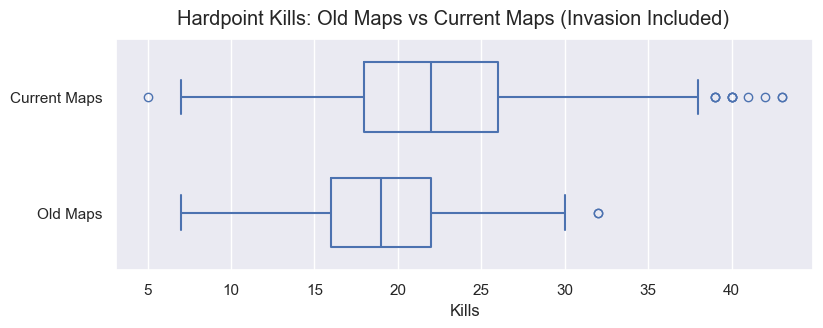

In [142]:
# Recreate Boxplots of Kills by Mode: Old Maps vs Current Maps (Invasion Included)

# Create figure with gridspec
f, axs = plt.subplots(figsize = (9, 3))

# Box Plots: Hardpoint
sns.boxplot(data = cdlDF[cdlDF['gamemode'] == 'Hardpoint'],
            y = "is_old_map", x = "kills",
            showfliers = True, fill = False, gap = 0.25)

# Styling
axs.set_yticklabels(['Current Maps', 'Old Maps']) 
axs.set_xlabel("Kills")
axs.set_ylabel("")

f.suptitle("Hardpoint Kills: Old Maps vs Current Maps (Invasion Included)")

Text(0, 0.5, 'Kills')

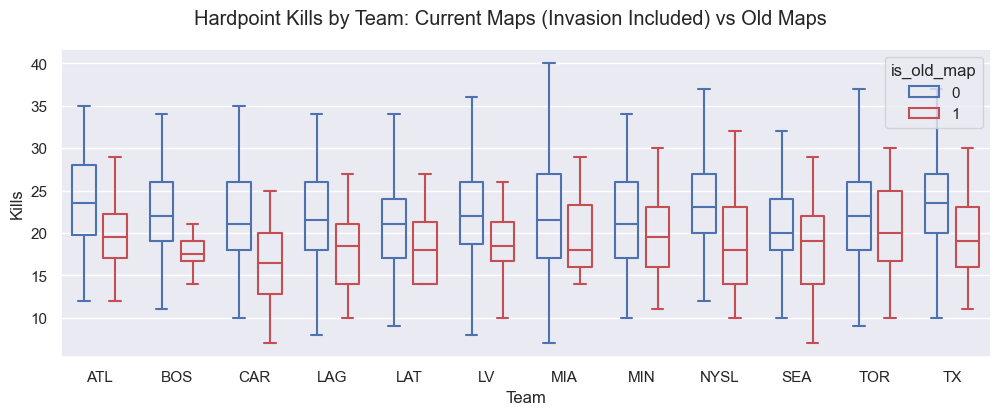

In [105]:
# Recreate Boxplots of Hardpoint Kills by Team: Old Maps vs Current Maps

# Filter cdlDF for Hardpoint Only and sort by team
queried_df = cdlDF[cdlDF['gamemode'] == 'Hardpoint'].sort_values("team_abbr")

# Create figure
fig, axs = plt.subplots(figsize = (12, 4))

# Box Plot
sns.boxplot(data = queried_df, x = "team_abbr", y = "kills", 
            showfliers = False, fill = False, gap = 0.25,
            hue = "is_old_map", hue_order = ["0", "1"],
            palette = ['#4c72b0', '#c44e52']
)

# Styling
fig.suptitle("Hardpoint Kills by Team: Current Maps (Invasion Included) vs Old Maps")

axs.set_xlabel("Team")
axs.set_ylabel("Kills")

In [106]:
# Create a copy of cdlDF to update with our changes
adj_cdlDF = cdlDF.copy()
adj_cdlDF.shape

(4648, 22)

In [107]:
# 1. Replace all old Map 1s with corresponding Map 4

# Get match_ids with replaceable Map 1
replaceable_ids = \
    series_with_old_HP[series_with_old_HP['is_map_1_replaceable?'] == 1]['match_id'].to_list()

# Drop all Map 1s from matches with replaceable Map 1
adj_cdlDF = adj_cdlDF[
    ~((adj_cdlDF['match_id'].isin(replaceable_ids)) & 
    (adj_cdlDF['map_num'] == 1))
    ]

# Change Map 4 to Map 1 for all matches with replaceable Map 1
adj_cdlDF.loc[((adj_cdlDF['match_id'].isin(replaceable_ids)) & (adj_cdlDF['map_num'] == 4)), 'map_num'] = 1
adj_cdlDF

,match_id,match_date,player,team,map_num,map_name,gamemode,kills,team_score,map_result,...,team_abbr,team_icon,opp,opp_abbr,opp_score,total_score,score_diff,dummy_x,before_major_3,is_old_map
0,27193,2023-12-08,aBeZy,Atlanta FaZe,1,Karachi,Hardpoint,24,250,1,...,ATL,FaZe,Boston Breach,BOS,238,488,12,0,1,0
1,27193,2023-12-08,Cellium,Atlanta FaZe,1,Karachi,Hardpoint,21,250,1,...,ATL,FaZe,Boston Breach,BOS,238,488,12,0,1,0
2,27193,2023-12-08,Drazah,Atlanta FaZe,1,Karachi,Hardpoint,25,250,1,...,ATL,FaZe,Boston Breach,BOS,238,488,12,0,1,0
3,27193,2023-12-08,Simp,Atlanta FaZe,1,Karachi,Hardpoint,33,250,1,...,ATL,FaZe,Boston Breach,BOS,238,488,12,0,1,0
4,27193,2023-12-08,Capsidal,Boston Breach,1,Karachi,Hardpoint,24,238,0,...,BOS,Breach,Atlanta FaZe,ATL,250,488,-12,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4643,27304,2024-05-03,Simp,Atlanta FaZe,3,Highrise,Control,20,3,1,...,ATL,FaZe,Las Vegas Legion,LV,0,3,3,0,0,0
4644,27304,2024-05-03,Asim,Las Vegas Legion,3,Highrise,Control,13,0,0,...,LV,Legion,Atlanta FaZe,ATL,3,3,-3,0,0,0
4645,27304,2024-05-03,Attach,Las Vegas Legion,3,Highrise,Control,12,0,0,...,LV,Legion,Atlanta FaZe,ATL,3,3,-3,0,0,0
4646,27304,2024-05-03,Gio,Las Vegas Legion,3,Highrise,Control,16,0,0,...,LV,Legion,Atlanta FaZe,ATL,3,3,-3,0,0,0


In [108]:
# Check work by examining a few matches
adj_cdlDF[
    (adj_cdlDF['match_id'].isin(replaceable_ids[:5])) & 
    (adj_cdlDF['map_num'] == 1)
    ][['match_id', 'map_name']].drop_duplicates().sort_values('match_id')

,match_id,map_name
264,27200,Karachi
824,27219,Karachi
1960,27237,Karachi
3264,52845,Rio
3680,53372,Karachi


In [109]:
# Compare with above
series_with_old_HP.loc[(series_with_old_HP['match_id'].isin(replaceable_ids[:5]))].sort_values('match_id')

,match_id,1,4,is_old_map_1?,is_old_map_4?,total_old_HPs,total_HPs,is_map_1_replaceable?
0,27200,Invasion,Karachi,1,0,1,2,1
3,27219,Invasion,Karachi,1,0,1,2,1
1,27237,Invasion,Karachi,1,0,1,2,1
4,52845,Invasion,Rio,1,0,1,2,1
2,53372,Invasion,Karachi,1,0,1,2,1


In [110]:
# 2. Check to ensure irreplaceable Map 1 Invasions are still included

# Get match_ids with irreplaceable Map 1 Invasion
irr_invasions = series_with_old_HP[
    (series_with_old_HP['is_map_1_replaceable?'] == 0) &
    (series_with_old_HP[1] == 'Invasion')
]['match_id'].to_list()

adj_cdlDF[adj_cdlDF['match_id'].isin(irr_invasions)].shape

(480, 22)

In [111]:
# 3. Drop all matches with irreplaceable Map 1 Skidrows and Terminals
irr_old_maps = no_invasion[
    (no_invasion['is_map_1_replaceable?'] == 0)
]['match_id'].to_list()

adj_cdlDF = adj_cdlDF[~adj_cdlDF['match_id'].isin(irr_old_maps)]
adj_cdlDF


,match_id,match_date,player,team,map_num,map_name,gamemode,kills,team_score,map_result,...,team_abbr,team_icon,opp,opp_abbr,opp_score,total_score,score_diff,dummy_x,before_major_3,is_old_map
0,27193,2023-12-08,aBeZy,Atlanta FaZe,1,Karachi,Hardpoint,24,250,1,...,ATL,FaZe,Boston Breach,BOS,238,488,12,0,1,0
1,27193,2023-12-08,Cellium,Atlanta FaZe,1,Karachi,Hardpoint,21,250,1,...,ATL,FaZe,Boston Breach,BOS,238,488,12,0,1,0
2,27193,2023-12-08,Drazah,Atlanta FaZe,1,Karachi,Hardpoint,25,250,1,...,ATL,FaZe,Boston Breach,BOS,238,488,12,0,1,0
3,27193,2023-12-08,Simp,Atlanta FaZe,1,Karachi,Hardpoint,33,250,1,...,ATL,FaZe,Boston Breach,BOS,238,488,12,0,1,0
4,27193,2023-12-08,Capsidal,Boston Breach,1,Karachi,Hardpoint,24,238,0,...,BOS,Breach,Atlanta FaZe,ATL,250,488,-12,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4643,27304,2024-05-03,Simp,Atlanta FaZe,3,Highrise,Control,20,3,1,...,ATL,FaZe,Las Vegas Legion,LV,0,3,3,0,0,0
4644,27304,2024-05-03,Asim,Las Vegas Legion,3,Highrise,Control,13,0,0,...,LV,Legion,Atlanta FaZe,ATL,3,3,-3,0,0,0
4645,27304,2024-05-03,Attach,Las Vegas Legion,3,Highrise,Control,12,0,0,...,LV,Legion,Atlanta FaZe,ATL,3,3,-3,0,0,0
4646,27304,2024-05-03,Gio,Las Vegas Legion,3,Highrise,Control,16,0,0,...,LV,Legion,Atlanta FaZe,ATL,3,3,-3,0,0,0


In [112]:
# Maps 1 - 3 Kills for every Player & Series
adj_1_thru_3_totals_df = adj_cdlDF[(adj_cdlDF['map_num'] <= 3)] \
    .groupby(['match_id', 'player', 'match_date', 'team_abbr', 'series_result'])['kills'].sum() \
    .reset_index()

adj_1_thru_3_totals_df = adj_1_thru_3_totals_df.sort_values(['match_id', 'team_abbr', "player"], ignore_index = True)
adj_1_thru_3_totals_df

,match_id,player,match_date,team_abbr,series_result,kills
0,27193,Cellium,2023-12-08,ATL,1,45
1,27193,Drazah,2023-12-08,ATL,1,51
2,27193,Simp,2023-12-08,ATL,1,72
3,27193,aBeZy,2023-12-08,ATL,1,54
4,27193,Capsidal,2023-12-08,BOS,0,58
...,...,...,...,...,...,...
1067,53374,aBeZy,2024-03-24,ATL,1,63
1068,53374,Dashy,2024-03-24,TX,0,55
1069,53374,Kenny,2024-03-24,TX,0,77
1070,53374,Pred,2024-03-24,TX,0,51


In [113]:
# Sort original Maps 1 - 3 Kills Player Totals DF by match, team, and player
map_1_thru_3_totals_df = map_1_thru_3_totals_df.sort_values(['match_id', 'team_abbr', "player"], ignore_index = True)
map_1_thru_3_totals_df

,match_id,player,match_date,team_abbr,series_result,kills
0,27193,Cellium,2023-12-08,ATL,1,45
1,27193,Drazah,2023-12-08,ATL,1,51
2,27193,Simp,2023-12-08,ATL,1,72
3,27193,aBeZy,2023-12-08,ATL,1,54
4,27193,Capsidal,2023-12-08,BOS,0,58
...,...,...,...,...,...,...
1179,53374,aBeZy,2024-03-24,ATL,1,63
1180,53374,Dashy,2024-03-24,TX,0,55
1181,53374,Kenny,2024-03-24,TX,0,77
1182,53374,Pred,2024-03-24,TX,0,51


In [114]:
# Check work
(len(map_1_thru_3_totals_df) - len(adj_1_thru_3_totals_df)) / 8

14.0

In [115]:
# Check work
len(irr_old_maps)

14

In [116]:
# Check differences in Maps 1 - 3 Kills Player Totals per Adjusted Series
adj_only = adj_1_thru_3_totals_df[
    adj_1_thru_3_totals_df['match_id'].isin(replaceable_ids)
].copy()

adj_only = adj_only.rename(columns={'kills': 'adj_kills'})
adj_only = pd.merge(
    adj_only, 
    map_1_thru_3_totals_df[['match_id', 'player', 'kills']], 
    on = ['match_id', 'player']
)

adj_only['diff'] = adj_only['adj_kills'] - adj_only['kills']
adj_only = adj_only.sort_values('diff', ascending = False, ignore_index = True)
adj_only

,match_id,player,match_date,team_abbr,series_result,adj_kills,kills,diff
0,27231,Clayster,2024-01-20,CAR,0,66,45,21
1,27197,Nero,2023-12-09,LV,1,79,59,20
2,27197,Owakening,2023-12-09,MIN,0,52,36,16
3,27197,Attach,2023-12-09,LV,1,68,53,15
4,27255,Pred,2024-03-02,TX,1,60,45,15
...,...,...,...,...,...,...,...,...
163,27237,Gwinn,2024-02-17,CAR,0,56,67,-11
164,27270,Assault,2024-03-15,LAG,0,41,52,-11
165,53372,Pred,2024-03-24,TX,0,50,63,-13
166,52933,Asim,2024-03-22,BOS,0,36,49,-13


In [117]:
# Check total adjusted kills per player
adj_totals_per_player = adj_only \
    .groupby(['player'])['diff'].sum() \
    .to_frame() \
    .reset_index() \
    .sort_values('diff', ascending = False, ignore_index = True)

adj_totals_per_player

,player,diff
0,Clayster,46
1,TJHaLy,36
2,Lynz,31
3,Owakening,21
4,FeLo,19
5,Nero,18
6,Standy,16
7,Attach,14
8,JurNii,14
9,Sib,13


In [124]:
# Add independent variables to adj_1_thru_3_totals_df
adj_cdlDF = adj_cdlDF[~(adj_cdlDF['map_num'] > 3)]

indep_vars = adj_cdlDF[['match_id', 'team_abbr', 'gamemode', 'map_result']].drop_duplicates(ignore_index = True) \
    .pivot(index = ['match_id', 'team_abbr'], columns = 'gamemode', values = 'map_result').reset_index()

indep_vars['Total Maps Won'] = indep_vars['Hardpoint'] + indep_vars['Search & Destroy'] + indep_vars['Control']

In [147]:
adj_1_thru_3_totals_df = pd.merge(
    adj_1_thru_3_totals_df, 
    indep_vars,
    on = ['match_id', 'team_abbr']
).sort_values(['match_date', 'match_id', 'team_abbr', 'player'], ignore_index = True)

adj_1_thru_3_totals_df

,match_id,player,match_date,team_abbr,series_result,kills,Hardpoint,Search & Destroy,Control,Total Maps Won
0,27193,Cellium,2023-12-08,ATL,1,45,1,1,0,2
1,27193,Drazah,2023-12-08,ATL,1,51,1,1,0,2
2,27193,Simp,2023-12-08,ATL,1,72,1,1,0,2
3,27193,aBeZy,2023-12-08,ATL,1,54,1,1,0,2
4,27193,Capsidal,2023-12-08,BOS,0,58,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
1067,27304,aBeZy,2024-05-03,ATL,1,56,1,1,1,3
1068,27304,Asim,2024-05-03,LV,0,38,0,0,0,0
1069,27304,Attach,2024-05-03,LV,0,38,0,0,0,0
1070,27304,Gio,2024-05-03,LV,0,39,0,0,0,0


# 7. Maps 1 - 3 Kills Visualizations: League & Individual Players

Text(0.5, 0, 'Kills')

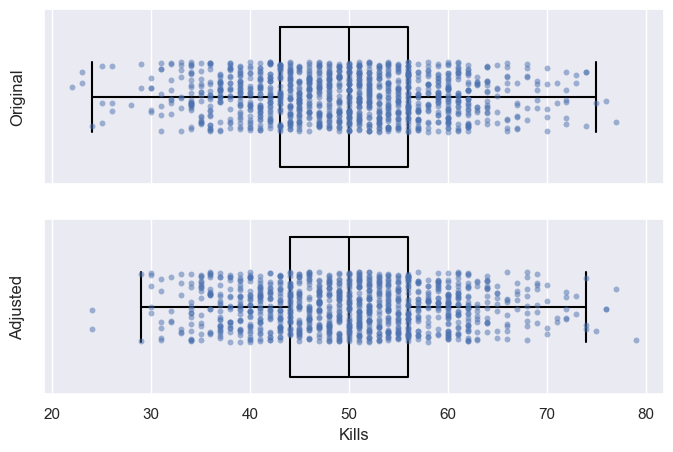

In [140]:
# Boxplot of Maps 1 - 3 Kills for All Players & Series: Original vs Adjusted

# Create figure with gridspec
f, axs = plt.subplots(2, 1, figsize = (8, 5), gridspec_kw = dict(wspace = 0.1), sharex = True)

# Box Plots
sns.boxplot(data = map_1_thru_3_totals_df, x = "kills", showfliers = False, 
            fill = False, color = "black", ax = axs[0])
sns.stripplot(data = map_1_thru_3_totals_df, x = "kills", jitter = 0.2, 
              size = 4.25, color = '#4c72b0', alpha = 0.5, ax = axs[0])

# Box Plot
sns.boxplot(data = adj_1_thru_3_totals_df, x = "kills", showfliers = False, 
            fill = False, color = "black", ax = axs[1])
sns.stripplot(data = adj_1_thru_3_totals_df, x = "kills", jitter = 0.2, 
              size = 4.25, color = '#4c72b0', alpha = 0.5, ax = axs[1])

# Styling
fig.suptitle("Maps 1 - 3 Kills for All Players & Series")
axs[0].set_ylabel("Original")
axs[1].set_ylabel("Adjusted")
axs[1].set_xlabel("Kills")

Text(0, 0.5, 'Kills')

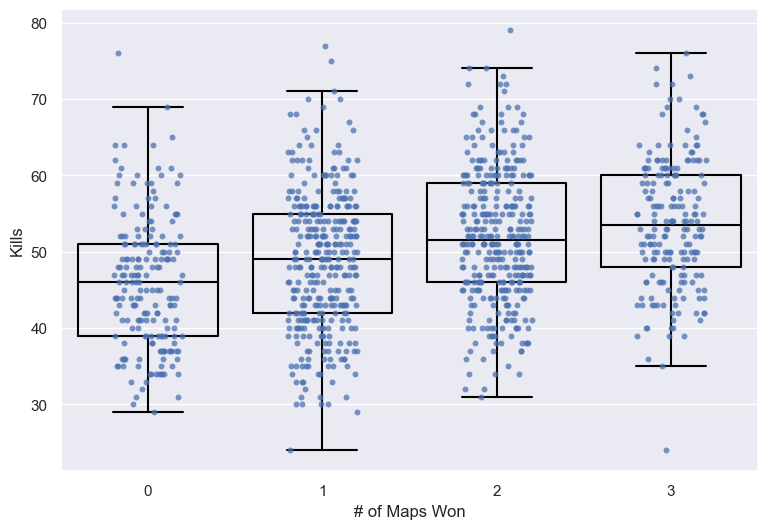

In [160]:
# Box Plots of Maps 1 - 3 Kills vs # of Maps Won

# Create figure 
f, axs = plt.subplots(figsize = (9, 6))

# Box Plot
sns.boxplot(adj_1_thru_3_totals_df, x = 'Total Maps Won', y = 'kills', 
            fill = False, color = "black", showfliers = False)
sns.stripplot(data = adj_1_thru_3_totals_df, x = 'Total Maps Won', y = "kills", 
              jitter = 0.2, size = 4.25, color = '#4c72b0', alpha = 0.75)

# Styling
fig.suptitle("Maps 1 - 3 Kills vs # of Maps Won: All Players")
axs.set_xlabel("# of Maps Won")
axs.set_ylabel("Kills")

Text(0, 0.5, 'Kills')

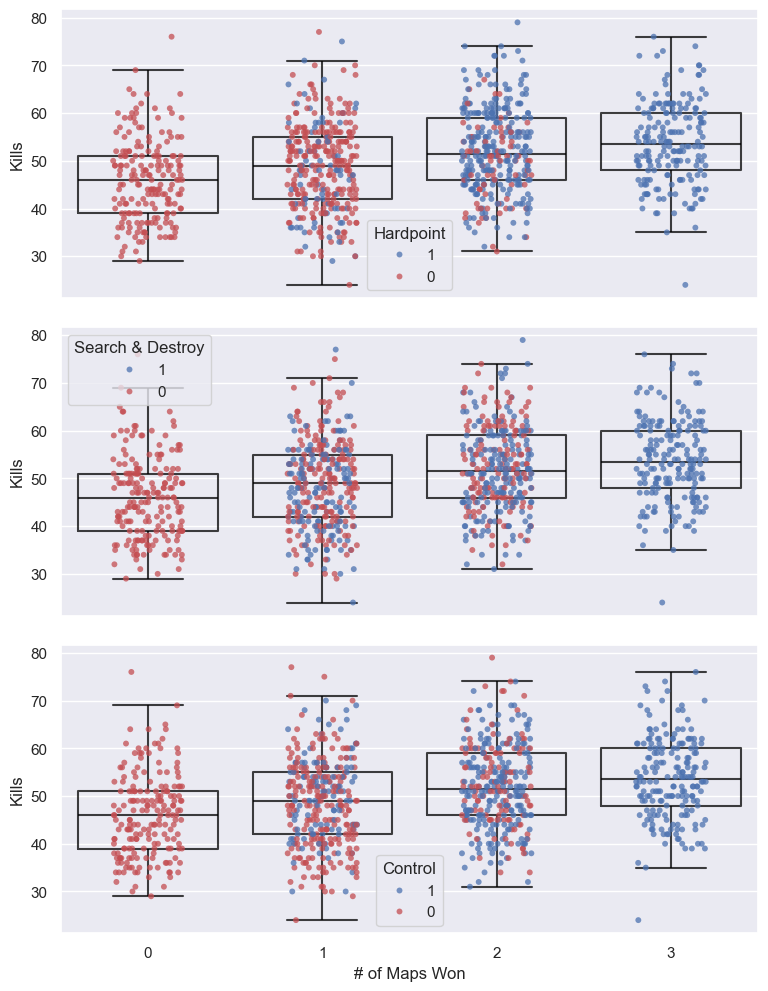

In [176]:
# Box Plot of Maps 1 - 3 Kills vs # of Maps Won & HP Won

# Create figure with gridspec
f, axs = plt.subplots(3, 1, figsize = (9, 12), gridspec_kw = dict(hspace = 0.1), sharex = True)

# Box Plot
sns.boxplot(adj_1_thru_3_totals_df, x = 'Total Maps Won', y = 'kills', 
            fill = False, color = "black", showfliers = False, 
            boxprops = dict(alpha = 0.75), medianprops = dict(alpha = 0.75), 
            whiskerprops = dict(alpha = 0.75), capprops = dict(alpha = 0.75), 
            ax = axs[0])
sns.stripplot(adj_1_thru_3_totals_df, x = 'Total Maps Won', y = 'kills', 
                hue = "Hardpoint", hue_order = [1, 0], palette = ['#4c72b0', '#c44e52'], 
                jitter = 0.2, size = 4.25, alpha = 0.75, ax = axs[0])

# Box Plot 
sns.boxplot(adj_1_thru_3_totals_df, x = 'Total Maps Won', y = 'kills', 
            fill = False, color = "black", showfliers = False, 
            boxprops = dict(alpha = 0.75), medianprops = dict(alpha = 0.75), 
            whiskerprops = dict(alpha = 0.75), capprops = dict(alpha = 0.75), 
            ax = axs[1])
sns.stripplot(adj_1_thru_3_totals_df, x = 'Total Maps Won', y = 'kills', 
                hue = "Search & Destroy", hue_order = [1, 0], palette = ['#4c72b0', '#c44e52'], 
                jitter = 0.2, size = 4.25, alpha = 0.75, ax = axs[1])

# Box Plot 
sns.boxplot(adj_1_thru_3_totals_df, x = 'Total Maps Won', y = 'kills', 
            fill = False, color = "black", showfliers = False, 
            boxprops = dict(alpha = 0.75), medianprops = dict(alpha = 0.75), 
            whiskerprops = dict(alpha = 0.75), capprops = dict(alpha = 0.75), 
            ax = axs[2])
sns.stripplot(adj_1_thru_3_totals_df, x = 'Total Maps Won', y = 'kills', 
                hue = "Control", hue_order = [1, 0], palette = ['#4c72b0', '#c44e52'], 
                jitter = 0.2, size = 4.25, alpha = 0.75, ax = axs[2])

# Styling
fig.suptitle("Maps 1 - 3 Kills vs # of Maps Won: All Players")
axs[2].set_xlabel("# of Maps Won")
axs[0].set_ylabel("Kills")
axs[1].set_ylabel("Kills")
axs[2].set_ylabel("Kills")

Text(0.5, 0, '')

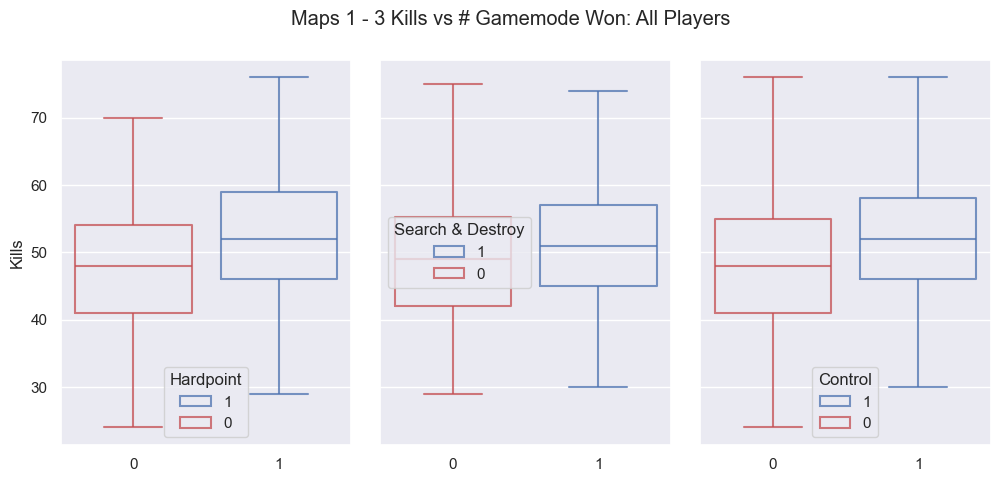

In [185]:
# Box Plot of Maps 1 - 3 Kills vs # Gamemode Won

# Create figure with gridspec
f, axs = plt.subplots(1, 3, figsize = (12, 5), gridspec_kw = dict(wspace = 0.1), sharey= True)

# Box Plot
sns.boxplot(adj_1_thru_3_totals_df, x = 'Hardpoint', y = 'kills', 
            fill = False, color = "black", showfliers = False, 
            boxprops = dict(alpha = 0.75), medianprops = dict(alpha = 0.75), 
            whiskerprops = dict(alpha = 0.75), capprops = dict(alpha = 0.75), 
            ax = axs[0], hue = "Hardpoint", hue_order = [1, 0], palette = ['#4c72b0', '#c44e52'])

# Box Plot 
sns.boxplot(adj_1_thru_3_totals_df, x = 'Search & Destroy', y = 'kills', 
            fill = False, color = "black", showfliers = False, 
            boxprops = dict(alpha = 0.75), medianprops = dict(alpha = 0.75), 
            whiskerprops = dict(alpha = 0.75), capprops = dict(alpha = 0.75), 
            ax = axs[1], hue = "Search & Destroy", hue_order = [1, 0], palette = ['#4c72b0', '#c44e52'])

# Box Plot 
sns.boxplot(adj_1_thru_3_totals_df, x = 'Control', y = 'kills', 
            fill = False, color = "black", showfliers = False, 
            boxprops = dict(alpha = 0.75), medianprops = dict(alpha = 0.75), 
            whiskerprops = dict(alpha = 0.75), capprops = dict(alpha = 0.75), 
            ax = axs[2], hue = "Control", hue_order = [1, 0], palette = ['#4c72b0', '#c44e52'])

# Styling
f.suptitle("Maps 1 - 3 Kills vs # Gamemode Won: All Players")
axs[0].set_ylabel("Kills")
axs[0].set_xlabel("")
axs[1].set_xlabel("")
axs[2].set_xlabel("")


In [119]:
# pd.set_option("display.max_rows", None)
pd.reset_option("display.max_rows")